﻿In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.


In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…


### Introduction


In this capstone, you will create a presentation about your findings in this OkCupid dataset.


The purpose of this capstone is to practice formulating questions and implementing Machine Learning techniques to answer those questions. We will give you guidance about the kinds of questions we asked, and the kinds of methods we used to answer those questions. But the questions you ask and how you answer them are entirely up to you. We're excited to see what kinds of different things you explore.
Compared to the other projects you have completed this far, we are requiring few restrictions on how you structure your code. The project is far more open-ended, and you should use your creativity. In addition, much of the code you write for later parts of this project will depend on how you decided to implement earlier parts. **Therefore, we strongly encourage you to read through the entire assignment before writing any code.**
________________


### Load in the DataFrame


The data is stored in **profiles.csv**. We can start to work with it in **dating.py** by using Pandas, which we have imported for you with the line:


```
import pandas as pd
```


and then loading the csv into a DataFrame: 


```
df = pd.read_csv("profiles.csv")
```


### Explore the Data


Let's make sure we understand what these columns represent!

Pick some columns and call `.head()` on them to see the first five rows of data. For example, we were curious about `job`, so we called:


```
df.job.head()
```


You can also call `value_counts()` on a column to figure out what possible responses there are, and how many of each response there was.


### Visualize some of the Data


We can start to build graphs from the data by first importing Matplotlib:


```
from matplotlib import pyplot as plt
```


and then making some plots!

For example, we were curious about the distribution of ages on the site, so we made a histogram of the `age` column:


```
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()
```


Try this code in your own file and take a look at the histogram it produces!


### Formulate a Question


As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:


```
df.sign.value_counts()
```


We started to wonder if there was a way to predict a user's Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.




### Augment your Data


In order to answer the question you've formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. `diet` consists of the options `vegan`, `vegetarian`, `anything`, etc. instead of numerical values).


Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.


For our question about Zodiac signs, we wanted to transform the `drinks` column into numerical data. We used:


```
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}


all_data["drinks_code"] = all_data.drinks.map(drink_mapping)
```


These lines of code created a new column called 'drinks_code' that mapped the following `drinks` values to these numbers:


| drinks      | drinks_code |
|-------------|-------------|
| not at all  | 0           |
| rarely      | 1           |
| socially    | 2           |
| often       | 3           |
| very often  | 4           |
| desperately | 5           |


We did the same for `smokes` and `drugs`.


We also wanted some numerical data about the short answer essays. We combined them all into one string, took out the `NaN`s, and then created a new column called `essay_len`:


```
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


all_data["essay_len"] = all_essays.apply(lambda x: len(x)))
```


We also created a column with average word length and a column with the frequency of the words "I" or "me" appearing in the essays.


### Normalize your Data!


In order to get accurate results, we should make sure our numerical data all has the same weight.


For our Zodiac features, we used:


```
feature_data = all_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]


x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
```


### Use Classification Techniques


We have learned how to perform classification in a few different ways.


- We learned about K-Nearest Neighbors by exploring IMDB ratings of popular movies 
- We learned about Support Vector Machines by exploring baseball statistics
- We learned about Naive Bayes by exploring Amazon Reviews


Some questions we used classification to tackle were:


- Can we predict sex with education level and income??
- Can we predict education level with essay text word counts?


### Use Regression Techniques


We have learned how to perform Multiple Linear Regression by playing with StreetEasy apartment data. Is there a way we can apply the techniques we learned to this dataset?


Some questions we used regression to tackle were:


- Predict income with length of essays and average word length?
- Predict age with the frequency of "I" or "me" in essays?


We also learned about K-Nearest Neighbors Regression. Which form of regression works better to answer your question?


### Analyze the Accuracy, Precision and Recall


After you have trained your model and run it, you will probably be curious about how well it did.


Find the accuracy, precision, and recall of each model you used, and create graphs showing how they changed.


For our question of classifying Zodiac signs, one graph we produced showed classification accuracy versus `k` (for K-Nearest Neighbors):
![accuracy vs k](https://s3.amazonaws.com/codecademy-content/programs/machine-learning/capstone/Zodiac_Accuracy.png)


The accuracy we would expect from predicting a Zodiac sign by randomly selecting one would be 1/12, or 0.0833. Our model did not significantly outperform this number. We were unimpressed.


### Create your Presentation


We want to see:


- at least two graphs containing exploration of the dataset
- a statement of your question (or questions!) and how you arrived there 
- the explanation of at least two new columns you created and how you did it
- the comparison between two classification approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- the comparison between two regression approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- an overall conclusion, with a preliminary answer to your initial question(s), next steps, and what other data you would like to have in order to better answer your question(s)


Good luck!

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('profiles.csv')

df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [4]:
# status_code
status_map = {'unknown': -1, 'single': 1, 'available': 2, 'seeing someone': 3, 'married': 4}
df['status_code'] = df['status'].map(status_map)

# languages_spoken
df['speaks'] = df['speaks'].fillna('unknown')
df['languages_spoken'] = df.apply(lambda x: x['speaks'].count(',')+1, axis=1)

# smokes_code
smokes_map = {'unknown': -1, 'no': 0, 'trying to quit':  1,
              'sometimes': 2, 'when drinking': 3, 'yes': 4}
df['smokes_code'] = df['smokes'].fillna('unknown').map(smokes_map)

# sign_code and sign_serious
def get_sign(sign_str):
    sign_map = {'unknown': -1, 'aries': 0,'taurus': 1,
                'gemini': 2, 'cancer': 3, 'leo': 4,
                'virgo': 5, 'libra': 6, 'scorpio': 7,
                'sagittarius': 8, 'capricorn': 9, 'aquarius': 10,
                'pisces': 11}
    if ' ' not in sign_str:
        sign = sign_str
    else:
        sign = sign_str.split(' ',1)[0]
    return sign_map[sign]
def get_sign_serious(sign_str):
    serious_map = {'but it doesn&rsquo;t matter': 0,
                   'and it&rsquo;s fun to think about': 1,
                   'and it matters a lot': 2}
    if ' ' not in sign_str:
        serious_code = -1
    else:
        serious = sign_str.split(' ',1)[1]
        serious_code = serious_map[serious]
    return serious_code
df['sign'] = df['sign'].fillna('unknown')
df['sign_code'] = df['sign'].apply(get_sign)
df['sign_serious'] = df['sign'].apply(get_sign_serious)

# sex_code
sex_map = {'m': 0, 'f': 1}
df['sex_code'] = df['sex'].map(sex_map)

# religion_code and religion_serious
def get_religion(religion_str):
    religion_map = {'unknown': -1, 'atheism': 0,'agnosticism': 1,
                   'christianity': 2, 'catholicism': 3, 'judaism': 4,
                    'buddhism': 5, 'hinduism': 6, 'islam': 7,
                   'other': 8}
    if ' ' not in religion_str:
        religion = religion_str
    else:
        religion = religion_str.split(' ',1)[0]
    return religion_map[religion]
def get_religion_serious(religion_str):
    serious_map = {'and laughing about it': 0,
                   'but not too serious about it': 1,
                   'and somewhat serious about it': 2,
                   'and very serious about it': 3}
    if ' ' not in religion_str:
        serious_code = -1
    else:
        serious = religion_str.split(' ',1)[1]
        serious_code = serious_map[serious]
    return serious_code
df['religion'] = df['religion'].fillna('unknown')
df['religion_code'] = df['religion'].apply(get_religion)
df['religion_serious'] = df['religion'].apply(get_religion_serious)

# cats_code and dogs_code
def get_cats_preference(pets_str):
    preference_map = {'dislikes': 0, 'likes': 1, 'has': 2}
    if 'cats' not in pets_str:
        preference_code = -1
    else:
        if 'and' in pets_str:
            pets_str = pets_str.split('and ', 1)[1]
        preference = pets_str.split(' ', 1)[0]
        preference_code = preference_map[preference]
    return preference_code
def get_dogs_preference(pets_str):
    preference_map = {'dislikes': 0, 'likes': 1, 'has': 2}
    if 'dogs' not in pets_str:
        preference_code = -1
    else:
        if 'and' in pets_str:
            pets_str = pets_str.split(' and', 1)[0]
        preference = pets_str.split(' ', 1)[0]
        preference_code = preference_map[preference]
    return preference_code
df['pets'] = df['pets'].fillna('unknown')
df['cats_code'] = df['pets'].apply(get_cats_preference)
df['dogs_code'] = df['pets'].apply(get_dogs_preference)

# orientation_code
orientation_map = {'straight': -1, 'bisexual': 0, 'gay': 1}
df['orientation_code'] = df['orientation'].map(orientation_map)

# has_kids and wants_kids
def get_offspring(offspring_str):
    offspring_map = {'unknown': -1, 'doesn&rsquo;t have kids': 0,
                    'has a kid': 1, 'has kids': 2}
    if ',' not in offspring_str:
        if offspring_str in offspring_map:
            kids = offspring_str
        else:
            kids = 'unknown'
    else:
        kids = offspring_str.split(',', 1)[0]
    return offspring_map[kids]
def get_wants_kids(offspring_str):
    offspring_map = {'unknown': -1, 'and doesn&rsquo;t want any': 0,
                     'but doesn&rsquo;t want more': 0, 'doesn&rsquo;t want kids': 0,
                     'might want kids': 1, 'but might want them': 1,
                     'and might want more': 1, 'wants kids': 2,
                     'but wants them': 2, 'and wants more': 2}
    if ',' not in offspring_str:
        if offspring_str in offspring_map:
            kids = offspring_str
        else:
            kids = 'unknown'
    else:
        kids = offspring_str.split(', ', 1)[1]
    return offspring_map[kids]
df['offspring'] = df['offspring'].fillna('unknown')
df['has_kids'] = df['offspring'].apply(get_offspring)
df['wants_kids'] = df['offspring'].apply(get_wants_kids)

# job_code
job_map = {'unknown': -1, 'rather not say': -1, 'unemployed': 0,
           'student': 1, 'transportation': 2,
           'hospitality / travel': 3, 'artistic / musical / writer': 4,
           'computer / hardware / software': 5, 'banking / financial / real estate': 6,
          'entertainment / media': 7, 'sales / marketing / biz dev': 8,
          'medicine / health': 9, 'science / tech / engineering': 10,
          'executive / management': 11, 'education / academia': 12,
          'clerical / administrative': 13, 'construction / craftsmanship': 14,
          'political / government': 15, 'law / legal services': 16,
          'military': 17, 'retired': 18, 'other': 19}
df['job'] = df['job'].fillna('unknown')
df['job_code'] = df['job'].map(job_map)

# ethnicity
df['ethnicity'] = df['ethnicity'].fillna('unknown')
df['ethnicity_white'] = df.apply(lambda x: 1 if 'white' in x['ethnicity'] else 0, axis=1)
df['ethnicity_black'] = df.apply(lambda x: 1 if 'black' in x['ethnicity'] else 0, axis=1)
df['ethnicity_other'] = df.apply(lambda x: 1 if 'other' in x['ethnicity'] else 0, axis=1)
df['ethnicity_hispanic'] = df.apply(lambda x: 1 if 'hispanic / latin' in x['ethnicity'] else 0, axis=1)
df['ethnicity_pacific_islander'] = df.apply(lambda x: 1 if 'pacific islander' in x['ethnicity'] else 0, axis=1)
df['ethnicity_native_american'] = df.apply(lambda x: 1 if 'native american' in x['ethnicity'] else 0, axis=1)
df['ethnicity_middle_eastern'] = df.apply(lambda x: 1 if 'middle eastern' in x['ethnicity'] else 0, axis=1)
df['ethnicity_indian'] = df.apply(lambda x: 1 if 'indian' in x['ethnicity'] else 0, axis=1)

# education_code
education_map = {'unknown': -1, 'working on space camp': -1, 'graduated from space camp': -1,
                'dropped out of space camp': -1, 'space camp': -1,
                 'dropped out of high school': 0,
                'working on high school': 0, 'high school': 1, 'graduated from high school': 1,
                'dropped out of two-year college': 1, 'working on two-year college': 1,
                'two-year college': 2, 'graduated from two-year college': 2, 
                'dropped out of college/university': 2, 'working on college/university': 2,
                'college/university': 3, 'graduated from college/university': 3,
                'dropped out of masters program': 3, 'working on masters program': 3,
                'masters program': 4, 'graduated from masters program': 4,
                'dropped out of ph.d program': 4, 'working on ph.d program': 4,
                'ph.d program': 5, 'graduated from ph.d program': 5,
                'dropped out of law school': 4, 'working on law school': 4,
                'law school': 6, 'graduated from law school': 6,
                'dropped out of med school': 4, 'working on med school': 4,
                'med school': 7, 'graduated from med school': 7}
df['education_code'] = df['education'].fillna('unknown').map(education_map)

# drugs_code
drugs_map = {'unknown': -1, 'never': 0,
             'sometimes':  1, 'often': 2}
df['drugs_code'] = df['drugs'].fillna('unknown').map(drugs_map)

# drinks_code
drinks_map = {'unknown': -1, 'not at all': 0, 'rarely':  1,
              'socially': 2, 'often': 3, 'very often': 4,
             'desperately': 5}
df['drinks_code'] = df['drinks'].fillna('unknown').map(drinks_map)

# diet_code
def get_diet(diet_str):
    if diet_str == 'unknown':
        return -1
    elif 'anything' in diet_str:
        return 0
    elif 'vegetarian' in diet_str:
        return 1
    elif 'vegan' in diet_str:
        return 2
    elif 'kosher' in diet_str:
        return 3
    elif 'halal' in diet_str:
        return 4
    elif 'other' in diet_str:
        return 5
df['diet'] = df['diet'].fillna('unknown')
df['diet_code'] = df['diet'].apply(get_diet)

# body_code
body_map = {'unknown': -1, 'rather not say': -1, 'used up':  0,
            'overweight': 1, 'full figured': 2, 'curvy': 3,
           'a little extra': 4, 'average': 5, 'thin': 6,
           'skinny': 7, 'athletic': 8, 'fit': 9,
           'jacked': 10}
df['body_code'] = df['body_type'].fillna('unknown').map(body_map)

# set key for labeling plots
orientation_key = ['Straight', 'Bi', 'Gay']

# set color schemes for plots
colors = ['black', 'saddlebrown', 'red', 'orange', 'yellow', 'green', 'blue', 'darkviolet']
colors_faded = ['dimgray', 'peru', 'tomato', 'goldenrod', 'khaki', 'mediumseagreen', 'royalblue', 'mediumorchid']
colors_dark = ['gray', 'brown', 'maroon', 'darkorange', 'gold', 'darkgreen', 'darkblue', 'purple']
colors_trans_gq = ['lightskyblue', 'pink', 'white', 'mediumpurple', 'seagreen']
colors_pan = ['deeppink', 'yellow', 'cyan']
colors_plus_trans = ['red', 'orange', 'yellow', 'green', 'blue', 'darkviolet', 'lightskyblue', 'whitesmoke', 'pink', 'black', 'saddlebrown']

In [5]:
len(df['location'].unique())

199

In [6]:
df['last_online'].sort_values()

30466    2011-06-27-01-52
9849     2011-06-27-08-22
13384    2011-06-27-08-25
58982    2011-06-27-09-33
10222    2011-06-27-09-34
               ...       
59842    2012-07-01-08-56
59838    2012-07-01-08-56
59826    2012-07-01-08-56
59819    2012-07-01-08-56
59873    2012-07-01-08-57
Name: last_online, Length: 59946, dtype: object

In [7]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,status_code,languages_spoken,smokes_code,sign_code,sign_serious,sex_code,religion_code,religion_serious,cats_code,dogs_code,orientation_code,has_kids,wants_kids,job_code,ethnicity_white,ethnicity_black,ethnicity_other,ethnicity_hispanic,ethnicity_pacific_islander,ethnicity_native_american,ethnicity_middle_eastern,ethnicity_indian,education_code,drugs_code,drinks_code,diet_code,body_code
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,1,1,2,2,-1,0,1,3,1,1,-1,0,1,2,1,0,0,0,0,0,0,0,2,0,2,0,4
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1,3,0,3,-1,0,1,1,1,1,-1,0,1,3,1,0,0,0,0,0,0,0,-1,1,3,5,5
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",unknown,68.0,-1,unknown,2012-06-27-09-10,"san francisco, california",unknown,straight,has cats,unknown,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,2,3,0,11,0,0,-1,-1,2,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,4,-1,2,0,6
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,unknown,m,pisces,no,"english, german (poorly)",single,1,2,0,11,-1,0,-1,-1,1,-1,-1,-1,0,1,1,0,0,0,0,0,0,0,2,-1,2,1,6
4,29,athletic,unknown,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",unknown,straight,likes dogs and likes cats,unknown,m,aquarius,

# Gender, Sexuality, and Status
#### sex_code

|sex|code|
|---|---|
|m|0|
|f|1|

#### orientation_code

|orientation|code|
|---|---|
|straight|-1|
|bisexual|0|
|gay|1|

#### status_code

|status|code|
|---|---|
|unknown|-1|
|single|1|
|available|2|
|seeing someone|3|
|married|4|

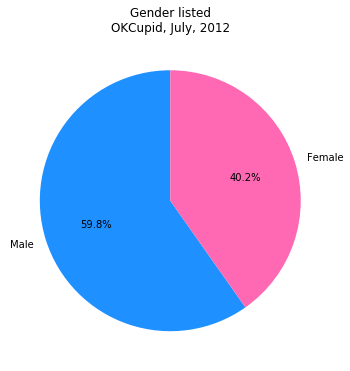

In [103]:
plt.figure(figsize=(7,6))
gender_counts = [len(df[df['sex']==i]) for i in ['m', 'f']]

plt.pie(gender_counts, colors=['dodgerblue', 'hotpink'],
       autopct='%1.1f%%', labels=['Male', 'Female'], startangle=90)
plt.title('Gender listed\nOKCupid, July, 2012', fontsize='large')

plt.savefig('gender_pie.png')
plt.show()

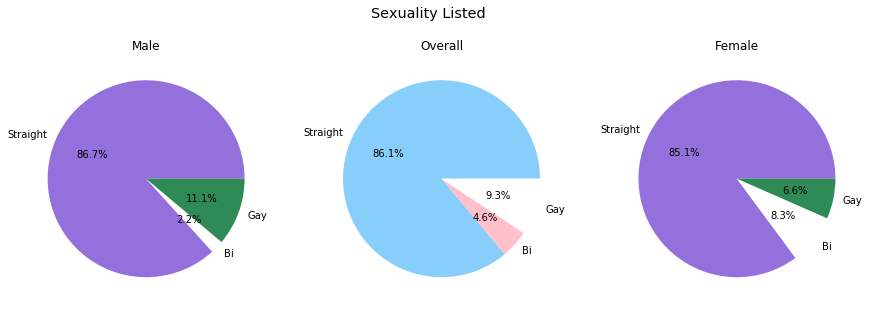

In [108]:
plt.figure(figsize=(15,5))

m_counts = [len(df[(df['sex']=='m') & (df['orientation_code']==i)]) for i in range(-1,2)]
f_counts = [len(df[(df['sex']=='f') & (df['orientation_code']==i)]) for i in range(-1,2)]
orientation_counts = [len(df[df['orientation_code']==i]) for i in range(-1,2)]


plt.suptitle('Sexuality Listed', fontsize='x-large')

plt.subplot(131)
plt.pie(m_counts, colors=['mediumpurple', 'white', 'seagreen'], autopct='%1.1f%%',
       labels=orientation_key)
plt.title('Male', fontsize='large')

plt.subplot(132)
plt.pie(orientation_counts, colors=colors_trans_gq, autopct='%1.1f%%',
       labels=orientation_key)
plt.title('Overall', fontsize='large')

plt.subplot(133)
plt.pie(f_counts, colors=['mediumpurple', 'white', 'seagreen'], autopct='%1.1f%%',
       labels=orientation_key)
plt.title('Female', fontsize='large')

plt.savefig('sexuality_gender.png')
plt.show()

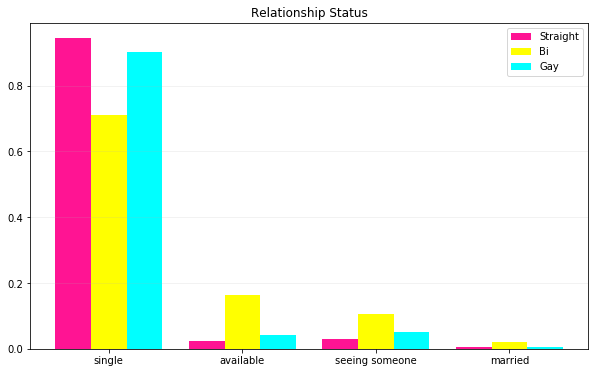

In [109]:
plt.figure(figsize=(10,6))

relationship_labels = ['single', 'available', 'seeing someone', 'married']
straight_relationship = [len(df[(df['status']==i) & (df['orientation_code']==-1)])/
                        len(df[(df['status']!='unknown') & (df['orientation_code']==-1)]) for i in relationship_labels]
bi_relationship = [len(df[(df['status']==i) & (df['orientation_code']==0)])/
                   len(df[(df['status']!='unknown') & (df['orientation_code']==0)]) for i in relationship_labels]
gay_relationship = [len(df[(df['status']==i) & (df['orientation_code']==1)])/
                    len(df[(df['status']!='unknown') & (df['orientation_code']==1)]) for i in relationship_labels]

straight_pos = [3*element + 0.8*1 for element in range(4)]
bi_pos = [3*element + 0.8*2 for element in range(4)]
gay_pos = [3*element + 0.8*3 for element in range(4)]

plt.bar(straight_pos, straight_relationship, color='deeppink', label='Straight')
plt.bar(bi_pos, bi_relationship, color='yellow', label='Bi')
plt.bar(gay_pos, gay_relationship, color='cyan', label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(4)], relationship_labels)
plt.legend()

plt.gca().yaxis.grid(True, alpha=0.2)
plt.title('Relationship Status')

plt.savefig('relationship_status.png')
plt.show()

# Language, Ethnicity, and Religion

#### languages_spoken

Amount of languages, separated by commas

#### ethnicity columns

|ethnicity (binary)|
|---|
|ethnicity_white|
|ethnicity_black|
|ethnicity_other|
|ethnicity_hispanic|
|ethnicity_pacific_islander|
|ethnicity_native_american|
|ethnicity_middle_eastern|
|ethnicity_indian|

#### religion_code

|religion|code|
|---|---|
|unknown|-1|
|atheism|0|
|agnosticism|1|
|christianity|2|
|catholicism|3|
|judaism|4|
|buddhism|5|
|hinduism|6|
|islam|7|
|other|8|

#### religion_serious

|serious|code|
|---|---|
|unknown|-1|
|and laughing about it|0|
|but not too serious about it|1|
|and somewhat serious about it|2|
|and very serious about it|3|

#### sign_code

|sign|code|
|---|---|
|unknown|-1|
|aries|0|
|taurus|1|
|gemini|2|
|cancer|3|
|leo|4|
|virgo|5|
|libra|6|
|scorpio|7|
|sagittarius|8|
|capricorn|9|
|aquarius|10|
|pisces|11|


#### sign_serious

|serious|code|
|---|---|
|unknown|-1|
|but it doesn't matter|0|
|and it's fun to think about|1|
|and it matters a lot|2|

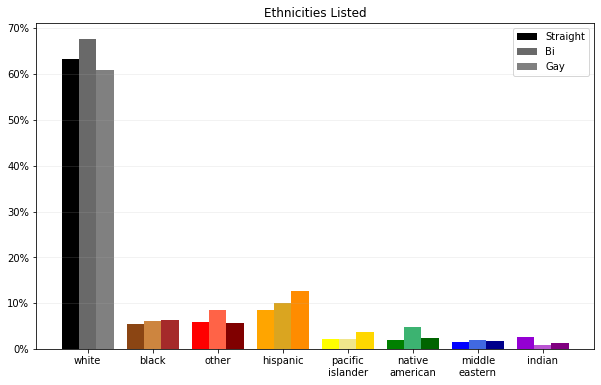

In [110]:
plt.figure(figsize=(10,6))

ethnicity_labels = ['white', 'black', 'other', 'hispanic', 'pacific\nislander',
                    'native\namerican', 'middle\neastern', 'indian']
ethnicity_rows = ['ethnicity_white', 'ethnicity_black', 'ethnicity_other',
                  'ethnicity_hispanic', 'ethnicity_pacific_islander',
                  'ethnicity_native_american', 'ethnicity_middle_eastern',
                  'ethnicity_indian']
straight_ethnicity = [df[df['orientation_code']==-1][i].sum()/
                      len(df[df['orientation_code']==-1]) for i in ethnicity_rows]
bi_ethnicity = [df[df['orientation_code']==0][i].sum()/
                len(df[df['orientation_code']==0]) for i in ethnicity_rows]
gay_ethnicity = [df[df['orientation_code']==1][i].sum()/
                 len(df[df['orientation_code']==1]) for i in ethnicity_rows]

straight_pos = [3*element + 0.8*1 for element in range(8)]
bi_pos = [3*element + 0.8*2 for element in range(8)]
gay_pos = [3*element + 0.8*3 for element in range(8)]

plt.bar(straight_pos, straight_ethnicity, color=colors, label='Straight')
plt.bar(bi_pos, bi_ethnicity, color=colors_faded, label='Bi')
plt.bar(gay_pos, gay_ethnicity, color=colors_dark, label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(8)], ethnicity_labels)
plt.yticks([0.1*i for i in range(8)], [str(10*i)+'%' for i in range(8)])
plt.legend()
plt.gca().yaxis.grid(True, alpha=0.2)
plt.title('Ethnicities Listed')

plt.savefig('ethnicities_listed.png')
plt.show()

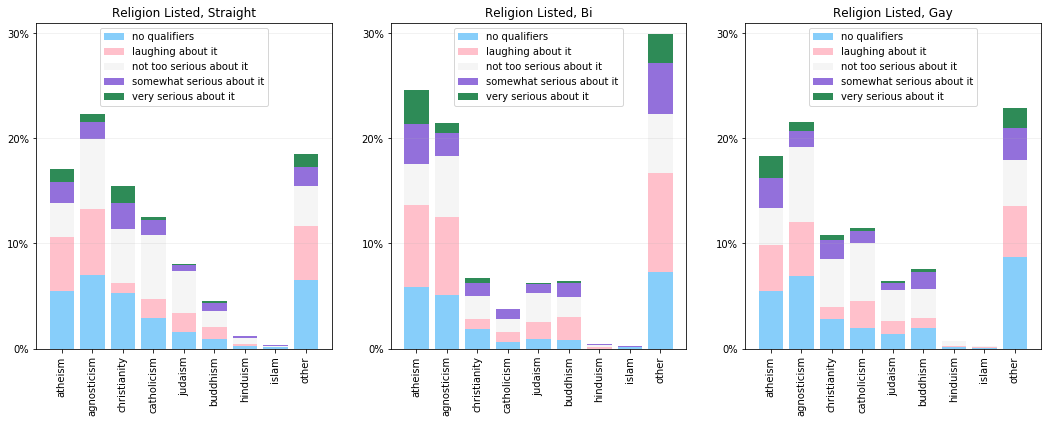

In [113]:
plt.figure(figsize=(14,6))
for j in range(-1,2):
    religion_unknown = [len(df[(df['religion_code']==i) & (df['religion_serious']==-1) & (df['orientation_code']==j)])/
                        len(df[(df['orientation_code']==j) & (df['religion_code']>=0)]) for i in range(0,9)]
    religion_laughing = [len(df[(df['religion_code']==i) & (df['religion_serious']==0) & (df['orientation_code']==j)])/
                         len(df[(df['orientation_code']==j) & (df['religion_code']>=0)]) for i in range(0,9)]
    religion_not_serious = [len(df[(df['religion_code']==i) & (df['religion_serious']==1) & (df['orientation_code']==j)])/
                            len(df[(df['orientation_code']==j) & (df['religion_code']>=0)]) for i in range(0,9)]
    religion_somewhat_serious = [len(df[(df['religion_code']==i) & (df['religion_serious']==2) & (df['orientation_code']==j)])/
                                 len(df[(df['orientation_code']==j) & (df['religion_code']>=0)]) for i in range(0,9)]
    religion_very_serious = [len(df[(df['religion_code']==i) & (df['religion_serious']==3) & (df['orientation_code']==j)])/
                             len(df[(df['orientation_code']==j) & (df['religion_code']>=0)]) for i in range(0,9)]
    religion_labels = ['atheism', 'agnosticism', 'christianity',
             'catholicism', 'judaism', 'buddhism', 'hinduism',
             'islam', 'other']
    bars1 = np.add(religion_unknown,religion_laughing).tolist()
    bars2 = np.add(bars1,religion_not_serious).tolist()
    bars3 = np.add(bars2,religion_somewhat_serious).tolist()
    
    plt.subplot(1,3,j+2)
    plt.bar(religion_labels,
           religion_unknown,
           color='lightskyblue',
           label='no qualifiers')
    plt.bar(religion_labels,
           religion_laughing,
           color='pink',
           label='laughing about it',
           bottom=religion_unknown)
    plt.bar(religion_labels,
           religion_not_serious,
           color='whitesmoke',
           label='not too serious about it',
           bottom=bars1)
    plt.bar(religion_labels,
           religion_somewhat_serious,
           color='mediumpurple',
           label='somewhat serious about it',
           bottom=bars2)
    plt.bar(religion_labels,
           religion_very_serious,
           color='seagreen',
           label='very serious about it',
           bottom=bars3)
    plt.legend(loc=9)
    plt.gca().yaxis.grid(True, alpha=0.2)
    plt.title('Religion Listed, ' + orientation_key[j+1])
    plt.xticks(rotation=90)
    plt.ylim(0,0.31)
    plt.yticks([0.1*i for i in range(4)], [str(i*10)+'%' for i in range(4)])

plt.savefig('religions_by_sexuality.png', bbox_inches='tight')
plt.show()

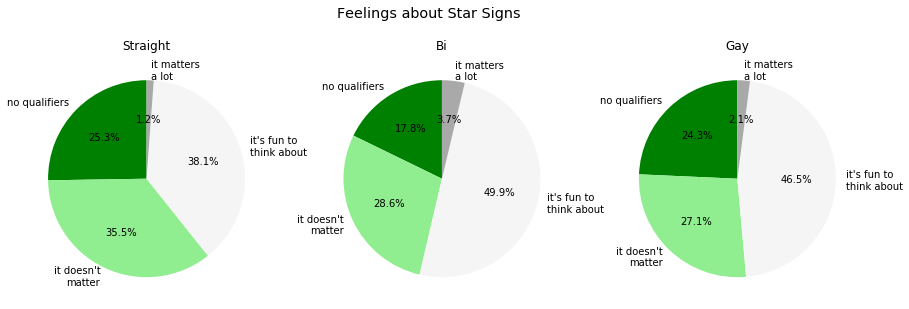

In [115]:
plt.figure(figsize=(15,5))
plt.suptitle('Feelings about Star Signs', fontsize='x-large')
sign_labels = ['no qualifiers', 'it doesn\'t\nmatter', 'it\'s fun to\nthink about',
               'it matters\na lot']
sign_colors=['green', 'lightgreen', 'whitesmoke', 'darkgray']

for j in range(-1,2):
    sign = [len(df[(df['orientation_code']==j) & (df['sign_code']!=-1) & (df['sign_serious']==i)]) for i in range(-1,3)]

    plt.subplot(1,3,j+2)
    plt.pie(sign, colors=sign_colors, autopct='%1.1f%%', labels=sign_labels, startangle=90)
    plt.title(orientation_key[j+1], fontsize='large')

plt.savefig('sign_feelings.png')
plt.show()

# Education, Career, and Income

#### education_code

|highest education|code|
|---|---|
|unknown|-1|
|none completed|0|
|high school|1|
|two-year college|2|
|college/university|3|
|masters program|4|
|ph.d program|5|
|law school|6|
|med school|7|

#### job_code

|job|code|
|---|---|
|unknown|-1|
|unemployed|0|
|student|1|
|transportation|2|
|hospitality/travel|3|
|artistic/musical/writer|4|
|computer/hardware/software|5|
|banking/financial/real estate|6|
|entertainment/media|7|
|sales/marketing/biz dev|8|
|medicine/health|9|
|science/tech/engineering|10|
|executive/management|11|
|education/academia|12|
|clerical/administrative|13|
|construction/craftsmanship|14|
|political/government|15|
|law/legal services|16|
|military|17|
|retired|18|
|other|19|

#### income

|income|
|---|
|-1,
|20000|
|30000|
|40000|
|50000|
|60000|
|70000|
|80000|
|100000|
|150000|
|250000|
|500000|
|1000000|

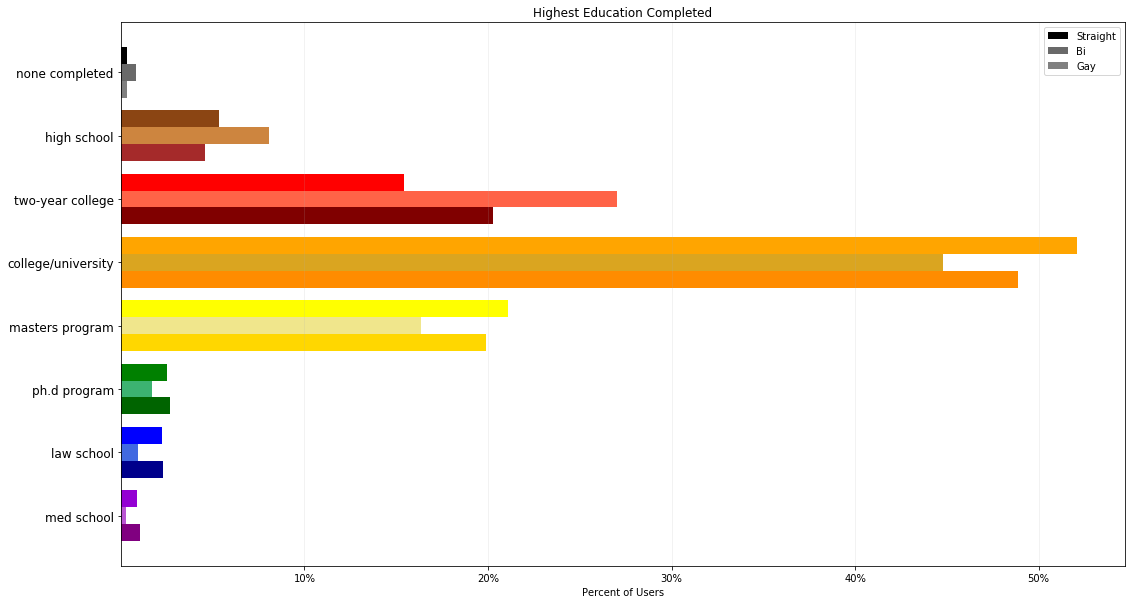

In [118]:
plt.figure(figsize=(18,10))

straight_ed = [len(df[(df['orientation_code']==-1) & (df['education_code']==i)])/
              len(df[(df['orientation_code']==-1) & (df['education_code']>=0)]) for i in range(8)]
bi_ed = [len(df[(df['orientation_code']==0) & (df['education_code']==i)])/
         len(df[(df['orientation_code']==0) & (df['education_code']>=0)]) for i in range(8)]
gay_ed = [len(df[(df['orientation_code']==1) & (df['education_code']==i)])/
          len(df[(df['orientation_code']==1) & (df['education_code']>=0)]) for i in range(8)]
ed_labels = ['none completed', 'high school', 'two-year college',
            'college/university', 'masters program', 'ph.d program',
            'law school', 'med school']

straight_pos = [3*element + 0.8*1 for element in range(8)]
bi_pos = [3*element + 0.8*2 for element in range(8)]
gay_pos = [3*element + 0.8*3 for element in range(8)]

plt.barh(straight_pos, straight_ed, color=colors, label='Straight')
plt.barh(bi_pos, bi_ed, color=colors_faded, label='Bi')
plt.barh(gay_pos, gay_ed, color=colors_dark, label='Gay')

plt.yticks([3*element + 0.8*2 for element in range(8)], ed_labels,  fontsize='large')
plt.xticks([0.1*i for i in range(1,6)],['10%', '20%', '30%', '40%', '50%'])
plt.xlabel('Percent of Users')
plt.legend()
plt.gca().invert_yaxis()
plt.gca().xaxis.grid(True, alpha=0.2)
plt.title('Highest Education Completed', fontsize='large')

plt.savefig('education.png')
plt.show()

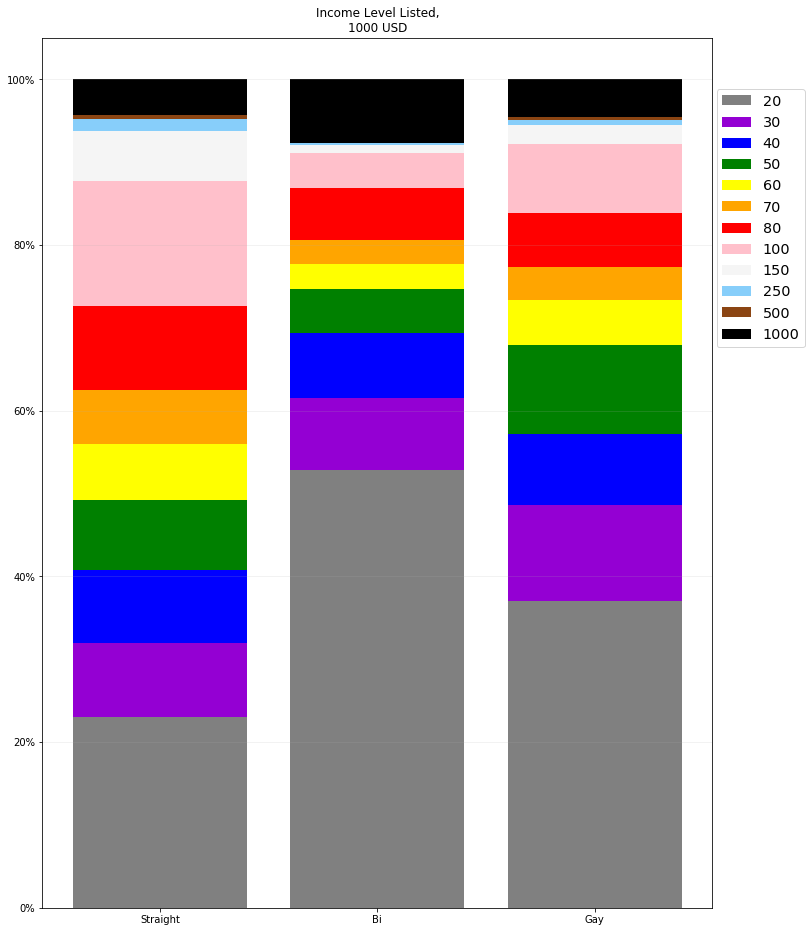

In [69]:
plt.figure(figsize=(12,16))
inc_labels = [20000, 30000, 40000, 50000, 60000, 70000, 80000,
              100000, 150000, 250000, 500000, 1000000]
inc_labels_str = ['20', '30', '40', '50', '60', '70',
                  '80', '100', '150', '250', '500', '1000']

incomes = [[len(df[(df['orientation_code']==i) & (df['income']==j)])/
            len(df[(df['orientation_code']==i) & (df['income']>0)]) for i in range(-1,2)] for j in inc_labels]

bars1 = np.add(incomes[0],incomes[1]).tolist()
bars2 = np.add(bars1,incomes[2]).tolist()
bars3 = np.add(bars2,incomes[3]).tolist()
bars4 = np.add(bars3,incomes[4]).tolist()
bars5 = np.add(bars4,incomes[5]).tolist()
bars6 = np.add(bars5,incomes[6]).tolist()
bars7 = np.add(bars6,incomes[7]).tolist()
bars8 = np.add(bars7,incomes[8]).tolist()
bars9 = np.add(bars8,incomes[9]).tolist()
bars10 = np.add(bars9,incomes[10]).tolist()

plt.bar(orientation_key,
       incomes[0],
       color='gray',
       label=inc_labels_str[0])
plt.bar(orientation_key,
       incomes[1],
       color='darkviolet',
       label=inc_labels_str[1],
       bottom=incomes[0])
plt.bar(orientation_key,
       incomes[2],
       color='blue',
       label=inc_labels_str[2],
       bottom=bars1)
plt.bar(orientation_key,
       incomes[3],
       color='green',
       label=inc_labels_str[3],
       bottom=bars2)
plt.bar(orientation_key,
       incomes[4],
       color='yellow',
       label=inc_labels_str[4],
       bottom=bars3)
plt.bar(orientation_key,
       incomes[5],
       color='orange',
       label=inc_labels_str[5],
       bottom=bars4)
plt.bar(orientation_key,
       incomes[6],
       color='red',
       label=inc_labels_str[6],
       bottom=bars5)
plt.bar(orientation_key,
       incomes[7],
       color='pink',
       label=inc_labels_str[7],
       bottom=bars6)
plt.bar(orientation_key,
       incomes[8],
       color='whitesmoke',
       label=inc_labels_str[8],
       bottom=bars7)
plt.bar(orientation_key,
       incomes[9],
       color='lightskyblue',
       label=inc_labels_str[9],
       bottom=bars8)
plt.bar(orientation_key,
       incomes[10],
       color='saddlebrown',
       label=inc_labels_str[10],
       bottom=bars9)
plt.bar(orientation_key,
       incomes[11],
       color='black',
       label=inc_labels_str[11],
       bottom=bars10)
plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.gca().yaxis.grid(True, alpha=0.2)
plt.legend(loc=1, bbox_to_anchor=(1.15,.95), fontsize='x-large')
plt.title('Income Level Listed,\n1000 USD')

plt.savefig('reported_income_stacked_bar.png', bbox_inches='tight')
plt.show()

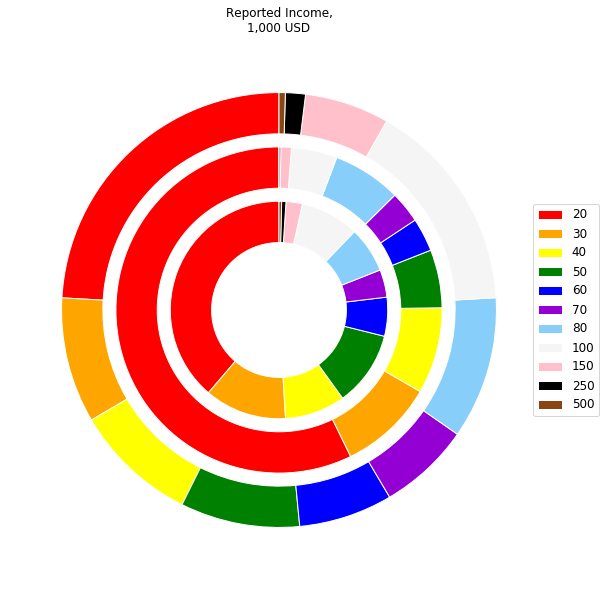

In [16]:
plt.figure(figsize=(18,10))
inc_labels = [20000, 30000, 40000, 50000, 60000, 70000, 80000,
              100000, 150000, 250000, 500000]
straight_inc = [len(df[(df['orientation_code']==-1) & (df['income']==i)]) for i in inc_labels]
bi_inc = [len(df[(df['orientation_code']==0) & (df['income']==i)]) for i in inc_labels]
gay_inc = [len(df[(df['orientation_code']==1) & (df['income']==i)]) for i in inc_labels]
inc_labels_str = ['20', '30', '40', '50', '60', '70',
                  '80', '100', '150', '250', '500']

size=.19

plt.pie(straight_inc, startangle=90, colors=colors_plus_trans,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.pie(bi_inc, startangle=90, radius=.75, colors=colors_plus_trans,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.pie(gay_inc, shadow=False, startangle=90, radius=.5, colors=colors_plus_trans,
       wedgeprops=dict(width=size, edgecolor='w'))
plt.legend(inc_labels_str, loc=7, bbox_to_anchor=(1.1,0.5), fontsize='large')
plt.title('Reported Income,\n1,000 USD')

plt.savefig('reported_income_pie.png')
plt.show()

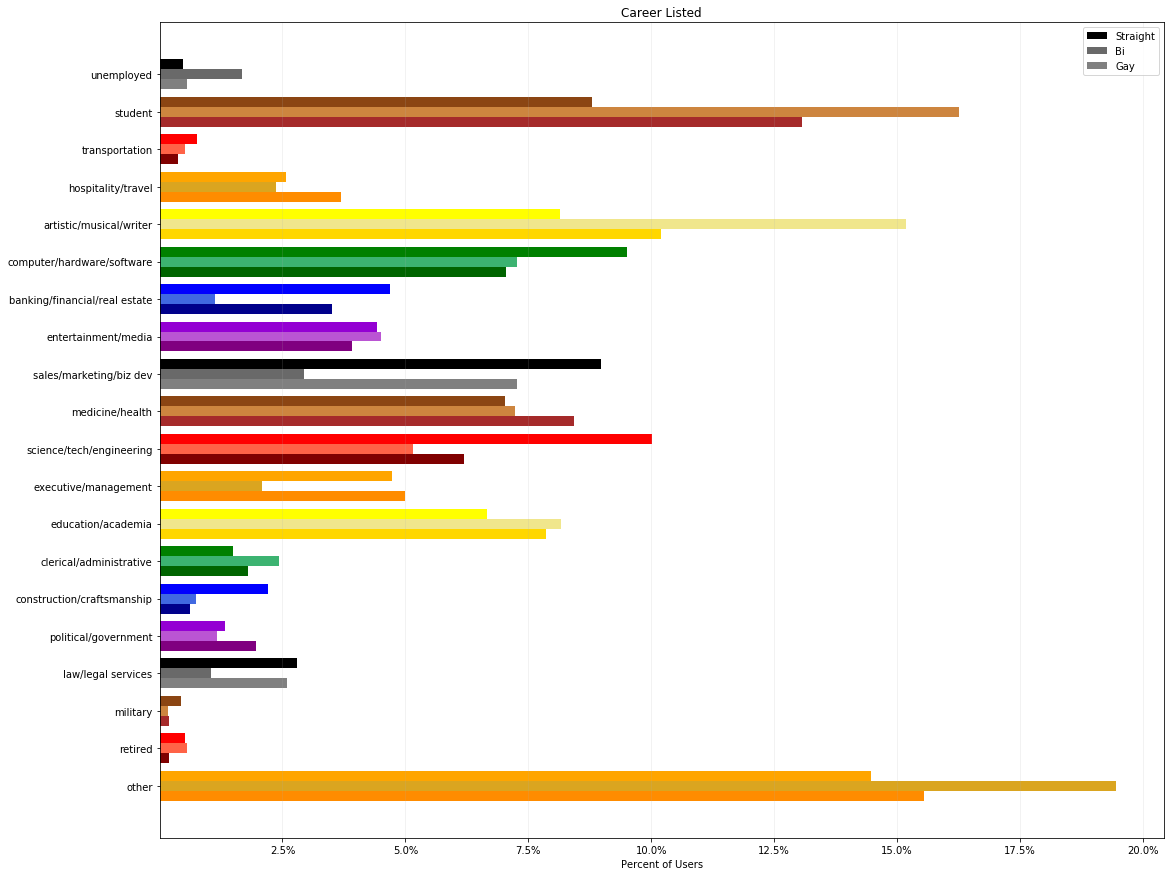

In [17]:
plt.figure(figsize=(18,15))

straight_job = [len(df[(df['orientation_code']==-1) & (df['job_code']==i)])/
              len(df[(df['orientation_code']==-1) & (df['job_code']>=0)]) for i in range(20)]
bi_job = [len(df[(df['orientation_code']==0) & (df['job_code']==i)])/
         len(df[(df['orientation_code']==0) & (df['job_code']>=0)]) for i in range(20)]
gay_job = [len(df[(df['orientation_code']==1) & (df['job_code']==i)])/
          len(df[(df['orientation_code']==1) & (df['job_code']>=0)]) for i in range(20)]
job_labels = ['unemployed', 'student', 'transportation', 'hospitality/travel',
              'artistic/musical/writer', 'computer/hardware/software',
              'banking/financial/real estate', 'entertainment/media',
              'sales/marketing/biz dev', 'medicine/health',
              'science/tech/engineering', 'executive/management',
              'education/academia', 'clerical/administrative',
              'construction/craftsmanship', 'political/government',
              'law/legal services', 'military', 'retired', 'other']

straight_pos = [3*element + 0.8*1 for element in range(20)]
bi_pos = [3*element + 0.8*2 for element in range(20)]
gay_pos = [3*element + 0.8*3 for element in range(20)]

plt.barh(straight_pos, straight_job, color=colors, label='Straight')
plt.barh(bi_pos, bi_job, color=colors_faded, label='Bi')
plt.barh(gay_pos, gay_job, color=colors_dark, label='Gay')

plt.yticks([3*element + 0.8*2 for element in range(20)], job_labels)
plt.xticks([0.025, 0.050, 0.075, 0.1, 0.125, 0.150, 0.175, 0.2],
           ['2.5%', '5.0%', '7.5%', '10.0%', '12.5%', '15.0%', '17.5%', '20.0%'])
plt.xlabel('Percent of Users')
plt.legend()
plt.gca().invert_yaxis()
plt.gca().xaxis.grid(True, alpha=0.2)
plt.title('Career Listed')

plt.savefig('careers.png')
plt.show()

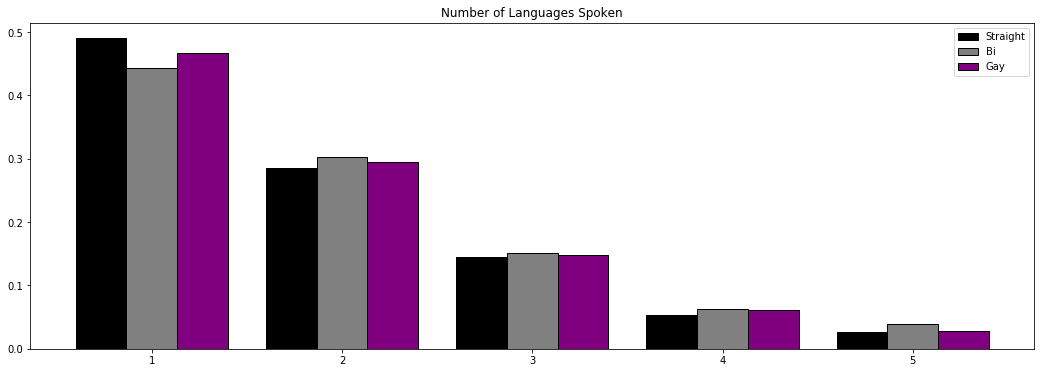

In [18]:
straight_languages = [len(df[(df['orientation_code']==-1) & (df['languages_spoken']==i)])/
                      len(df[df['orientation_code']==-1]) for i in range(1,6)]
bi_languages = [len(df[(df['orientation_code']==0) & (df['languages_spoken']==i)])/
                len(df[df['orientation_code']==0]) for i in range(1,6)]
gay_languages = [len(df[(df['orientation_code']==1) & (df['languages_spoken']==i)])/
                 len(df[df['orientation_code']==1]) for i in range(1,6)]

language_labels = range(1,6)
plt.figure(figsize=(18,6))

straight_pos = [3*element + 0.8*1 for element in range(5)]
bi_pos = [3*element + 0.8*2 for element in range(5)]
gay_pos = [3*element + 0.8*3 for element in range(5)]

plt.bar(straight_pos, straight_languages, edgecolor='black', color='black', label='Straight')
plt.bar(bi_pos, bi_languages, edgecolor='black', color='gray', label='Bi')
plt.bar(gay_pos, gay_languages, edgecolor='black', color='purple', label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(5)], language_labels)
plt.legend()
plt.title('Number of Languages Spoken')

plt.show()

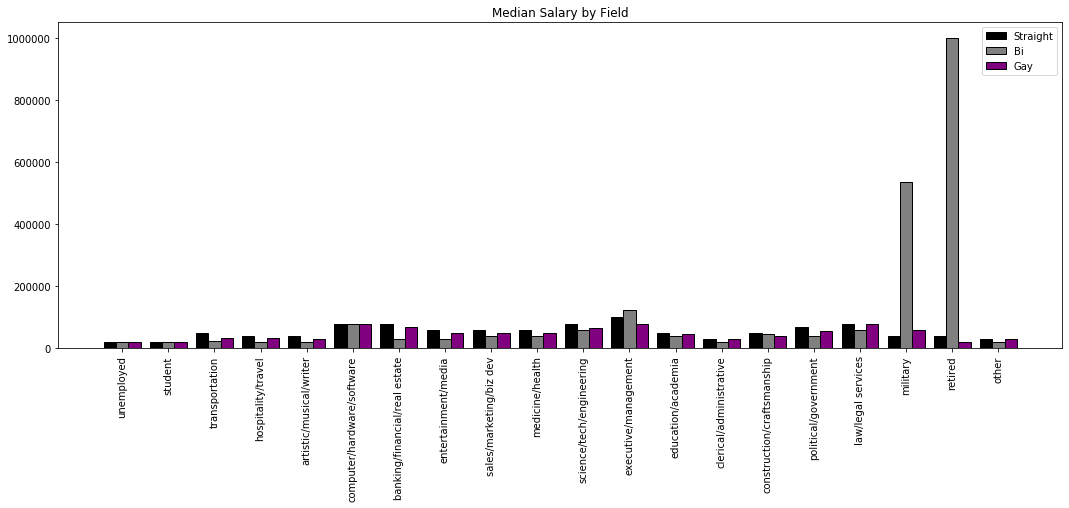

In [19]:
straight_salaries = [df[(df['orientation_code']==-1) & (df['job_code']==i) & (df['income'] > 0)]['income'].median() for i in range(20)]
bi_salaries = [df[(df['orientation_code']==0) & (df['job_code']==i) & (df['income'] > 0)]['income'].median() for i in range(20)]
gay_salaries = [df[(df['orientation_code']==1) & (df['job_code']==i) & (df['income'] > 0)]['income'].median() for i in range(20)]

plt.figure(figsize=(18,6))

straight_pos = [3*element + 0.8*1 for element in range(20)]
bi_pos = [3*element + 0.8*2 for element in range(20)]
gay_pos = [3*element + 0.8*3 for element in range(20)]

plt.bar(straight_pos, straight_salaries, edgecolor='black', color='black', label='Straight')
plt.bar(bi_pos, bi_salaries, edgecolor='black', color='gray', label='Bi')
plt.bar(gay_pos, gay_salaries, edgecolor='black', color='purple', label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(20)], job_labels, rotation=90)
plt.legend()
plt.title('Median Salary by Field')

plt.show()

In [20]:
df[(df['orientation_code']==0) & (df['job_code']==17)]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,status_code,languages_spoken,smokes_code,sign_code,sign_serious,sex_code,religion_code,religion_serious,cats_code,dogs_code,orientation_code,has_kids,wants_kids,job_code,ethnicity_white,ethnicity_black,ethnicity_other,ethnicity_hispanic,ethnicity_pacific_islander,ethnicity_native_american,ethnicity_middle_eastern,ethnicity_indian,education_code,drugs_code,drinks_code,diet_code,body_code
11001,29,average,strictly other,not at all,never,working on masters program,im bisexual i love being in the bitch in the r...,taking online classes towards my master degree,being there for people and a really good liste...,your shy but very easy to talk to and people s...,movies with swords like<br />\nking arthur<br ...,crossdressing<br />\nmarriage<br />\nkids<br /...,what i would do if i had a kid or if i met a f...,NaN,i was molested when i was five years old by tw...,NaN,"asian, black",69.0,70000,military,2012-06-30-09-46,"san leandro, california","doesn&rsquo;t have kids, but might want them",bisexual,likes dogs and dislikes cats,christianity,m,unknown,no,english,single,1,1,0,-1,-1,0,2,-1,0,1,0,0,1,17,0,1,0,0,0,0,0,0,3,0,0,5,5
17964,38,average,strictly kosher,rarely,never,graduated from college/university,"never done this online dating thing, so we'll ...",NaN,NaN,"my ethnicity, people are always wondering what...",NaN,NaN,why there are so many taco enthusiasts on this...,NaN,NaN,NaN,white,68.0,-1,military,2012-06-29-19-20,"san francisco, california",unknown,bisexual,likes dogs and has cats,judaism and somewhat serious about it,f,gemini and it&rsquo;s fun to think about,no,"english (fluently), arabic (okay)",single,1,2,0,2,1,1,4,2,2,1,0,-1,-1,17,1,0,0,0,0,0,0,0,3,0,1,3,5
21674,25,skinny,mostly vegetarian,socially,sometimes,graduated from two-year college,"when i'm at home alone, it's time to relax wit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"i'm bi-curious, but prefer men. i'm open to wo...",NaN,white,69.0,-1,military,2011-07-23-21-47,"berkeley, california",doesn&rsquo;t want kids,bisexual,likes dogs and likes cats,agnosticism and somewhat serious about it,f,unknown,when drinking,"english (fluently), sign language (okay)",single,1,2,3,-1,-1,1,1,2,1,1,0,-1,0,17,1,0,0,0,0,0,0,0,2,1,2,1,7
30267,22,thin,strictly kosher,desperately,often,graduated from med school,hot polycephalic children in the city runnin' ...,double date,triple,"that i'm not one person, i'm several!","food, movies, music, shows, and books.","catheters, travel, our collective health, infr...",eachother! we're in glove.,"simultaneously self-(each other) flagellating,...",i'm very popular on the innerwebs.,u r 2 ppl 2 n u can handle dis,"asian, middle eastern, black, native american,...",60.0,1000000,military,2012-06-24-00-12,"san francisco, california",has kids,bisexual,unknown,unknown,f,unknown,sometimes,"english (fluently), chechen (fluently), khmer ...",single,1,5,2,-1,-1,1,-1,-1,-1,-1,0,2,-1,17,1,1,1,1,1,1,1,1,7,2,5,3,6


In [21]:
for i in range(6,17):
    print(df.iloc[30267, i])

hot polycephalic children in the city runnin' wild, lookin' pretty.
double date
triple
that i'm not one person, i'm several!
food, movies, music, shows, and books.
catheters, travel, our collective health, infrastructure, horsing,
and truth.
eachother! we're in glove.
simultaneously self-(each other) flagellating, texting in
eachother's crotch regions and in unison, and inane voice "this
party sucks."
i'm very popular on the innerwebs.
u r 2 ppl 2 n u can handle dis
asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other


In [22]:
df[(df['orientation_code']==0) & (df['job_code']==18) & (df['income']>0)]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,status_code,languages_spoken,smokes_code,sign_code,sign_serious,sex_code,religion_code,religion_serious,cats_code,dogs_code,orientation_code,has_kids,wants_kids,job_code,ethnicity_white,ethnicity_black,ethnicity_other,ethnicity_hispanic,ethnicity_pacific_islander,ethnicity_native_american,ethnicity_middle_eastern,ethnicity_indian,education_code,drugs_code,drinks_code,diet_code,body_code
4649,33,fit,vegetarian,often,sometimes,graduated from college/university,"kinky, open, sweet, queer, sex positive, femin...",managing an art store and going the distance w...,lebertanz!,probably that i'm dressed in a three-piece sui...,i'm never sure how to curate a list like this....,six nice hats.,kinky sex and other worthy causes.<br />\nalso...,the walrus.,i'm a hopeless romantic.,for friends: you are up for a random adventure...,other,71.0,1000000,retired,2012-06-22-12-28,"berkeley, california",doesn&rsquo;t want kids,bisexual,unknown,atheism,m,scorpio and it&rsquo;s fun to think about,no,"english, german (okay), thai (okay), sanskrit ...",available,2,4,0,7,1,0,0,-1,-1,-1,0,-1,0,18,0,0,1,0,0,0,0,0,3,1,3,1,9
15548,28,jacked,mostly other,socially,sometimes,graduated from college/university,i divide my time between awe-filled wonderment...,trying to fill up the minutes with something w...,being half-serious and half-joking at the same...,"i'm always wearing a t-shirt and jeans, sneake...",i enjoy too many things to properly list them....,free stuff!!!<br />\npower chords<br />\npuns<...,nothing and everything all at once<br />\n-ism...,looking for love in all the wrong places.,sometimes i care too much.,you're ready for this jelly,white,65.0,1000000,retired,2012-06-15-19-41,"oakland, california",unknown,bisexual,likes dogs and likes cats,unknown,f,pisces,no,"english (fluently), lisp (poorly), spanish (po...",single,1,5,0,11,-1,1,-1,-1,1,1,0,-1,-1,18,1,0,0,0,0,0,0,0,3,1,2,5,10
21998,37,skinny,mostly anything,not at all,never,graduated from space camp,any torchwood fans out there? especially the f...,retired. *somewhat* voluntarily...,wasting time on the www...,kafos.,"isaac asimov, jeff lindsay, anne rice, j.k. ro...","depends if you mean ""actually probable situati...",the interpersonal relationships of fictional c...,watching tv with my loved ones.,polio survivor as a toddler.,you like thinking about the interpersonal rela...,white,65.0,30000,retired,2012-01-18-22-41,"san leandro, california",unknown,bisexual,likes dogs and likes cats,agnosticism and laughing about it,m,leo but it doesn&rsquo;t matter,no,"english (fluently), c++ (poorly), sign languag...",seeing someone,3,5,0,4,0,0,1,0,1,1,0,-1,-1,18,1,0,0,0,0,0,0,0,-1,0,0,0,7
25039,21,average,mostly halal,not at all,never,NaN,i hate this part. it is too hard for me to lik...,making pancake of my life,making people laugh and bothering people somet...,depend on person lol,hannah montana hahahah !!!!,first money<br />\nrockstar<br />\nfriends and...,planning retirement,friday night is not special night for me,i don't like to answer this stupid question<br...,if you are nice and sweet person<br />\nand if...,"asian, middle eastern",70.0,20000,retired,2012-04-07-10-30,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",bisexual,dislikes dogs and dislikes cats,islam,m,leo,no,"english, hindi, urdu",married,4,3,0,4,-1,0,7,-1,0,0,0,0,0,18,0,0,0,0,0,0,1,0,-1,0,0,4,5
25159,23,curvy,strictly other,socially,sometimes,graduated from college/university,"i'm interested in spontaneity, cynicism, and c...",discovering the redemptive qualities of not be...,wissenschaft.<br />\n<br />\ncooking.,i have a lot to talk about but also a lot to l...,i can usually find value in even the most wret...,"other than the duhs (books, food, talking, cla...","too many thing

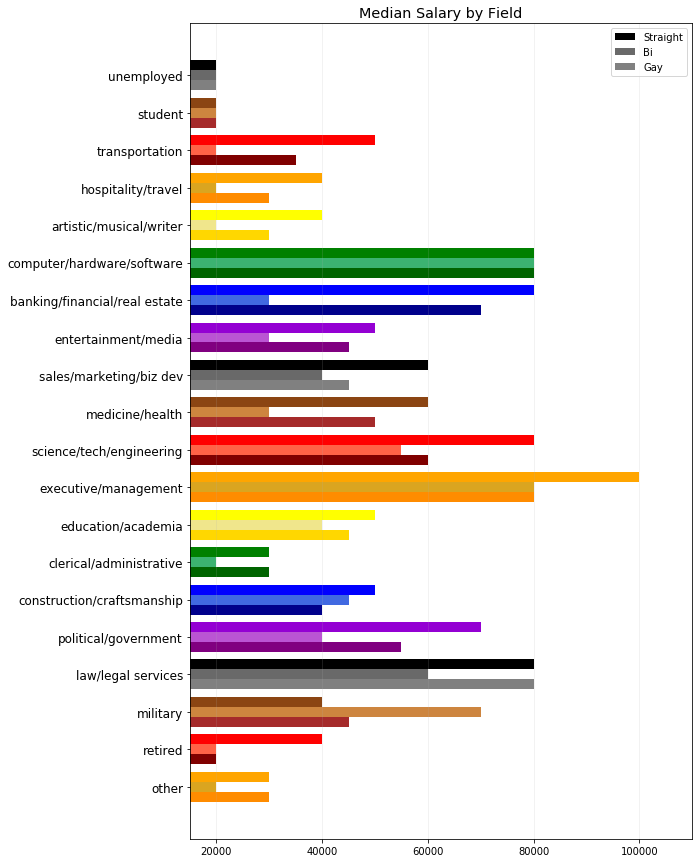

In [23]:
straight_salaries = [df[(df['orientation_code']==-1) & (df['job_code']==i) & (df['income'] > 0) & (df['income']<1000000)]['income'].median() for i in range(20)]
bi_salaries = [df[(df['orientation_code']==0) & (df['job_code']==i) & (df['income'] > 0) & (df['income']<1000000)]['income'].median() for i in range(20)]
gay_salaries = [df[(df['orientation_code']==1) & (df['job_code']==i) & (df['income'] > 0) & (df['income']<1000000)]['income'].median() for i in range(20)]

plt.figure(figsize=(9,15))

straight_pos = [3*element + 0.8*1 for element in range(20)]
bi_pos = [3*element + 0.8*2 for element in range(20)]
gay_pos = [3*element + 0.8*3 for element in range(20)]

plt.barh(straight_pos, straight_salaries, color=colors, label='Straight')
plt.barh(bi_pos, bi_salaries, color=colors_faded, label='Bi')
plt.barh(gay_pos, gay_salaries, color=colors_dark, label='Gay')

plt.yticks([3*element + 0.8*2 for element in range(20)], job_labels, fontsize='large')
plt.legend()
plt.xlim(15000,110000)
plt.gca().invert_yaxis()
plt.gca().xaxis.grid(True, alpha=0.2)
plt.title('Median Salary by Field', fontsize='x-large')

plt.savefig('median_salaries.png', bbox_inches = "tight")
plt.show()

# Pets and Children

#### cats_code

|cats|code|
|---|---|
|unknown|-1|
|dislikes|0|
|likes|1|
|has|2|

#### dogs_code

|dogs|code|
|---|---|
|unknown|-1|
|dislikes|0|
|likes|1|
|has|2|

#### has_kids

|kids|code|
|---|---|
|unknown|-1|
|doesn't have kids|0|
|has a kid|1|
|has kids|2|

#### wants_kids

|kids|code|
|---|---|
|unknown|-1|
|doesn't want any/more|0|
|might want/might want more|1|
|wants kids/more|2|

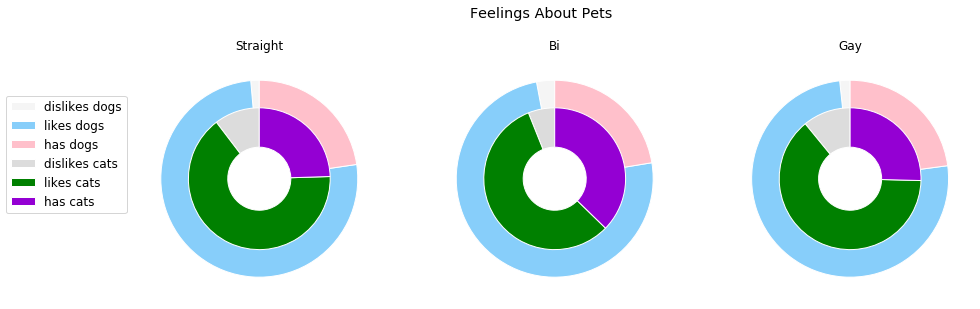

In [119]:
fig = plt.figure(figsize=(15,5))
plt.suptitle('Feelings About Pets', fontsize='x-large')
size=.4
for j in range(-1,2):
    plt.subplot(1,3,j+2)
    cats_count = [len(df[(df['orientation_code']==j) & (df['cats_code']==i)]) for i in range(3)]
    dogs_count = [len(df[(df['orientation_code']==j) & (df['dogs_code']==i)]) for i in range(3)]

    plt.pie(dogs_count, startangle=90, colors=['whitesmoke', 'lightskyblue', 'pink'],
           wedgeprops=dict(width=size, edgecolor='w'))
    plt.pie(cats_count, startangle=90, colors=['gainsboro', 'green', 'darkviolet'],
            radius=.72, wedgeprops=dict(width=size, edgecolor='w'))
    plt.title(orientation_key[j+1], fontsize='large')

fig.legend(labels=['dislikes dogs', 'likes dogs', 'has dogs',
                  'dislikes cats', 'likes cats', 'has cats'],
           loc=6, fontsize='large')

plt.savefig('pets.png', bbox_inches='tight')
plt.show()

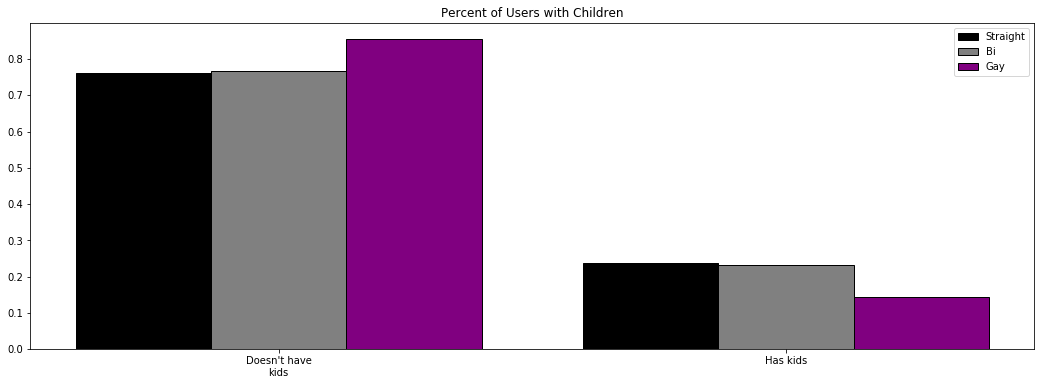

In [25]:
plt.figure(figsize=(18,6))

kids_values_straight = [len(df[(df['orientation_code']==-1) & (df['has_kids']==0)])/
                        len(df[(df['orientation_code']==-1) & (df['has_kids']>=0)]),
                        len(df[(df['orientation_code']==-1) & (df['has_kids']>=1)])/
                       len(df[(df['orientation_code']==-1) & (df['has_kids']>=0)])]
kids_values_bi = [len(df[(df['orientation_code']==0) & (df['has_kids']==0)])/
                  len(df[(df['orientation_code']==0) & (df['has_kids']>=0)]),
                  len(df[(df['orientation_code']==0) & (df['has_kids']>=1)])/
                  len(df[(df['orientation_code']==0) & (df['has_kids']>=0)])]
kids_values_gay = [len(df[(df['orientation_code']==1) & (df['has_kids']==0)])/
                   len(df[(df['orientation_code']==1) & (df['has_kids']>=0)]),
                   len(df[(df['orientation_code']==1) & (df['has_kids']>=1)])/
                  len(df[(df['orientation_code']==1) & (df['has_kids']>=0)])]

kids_labels = ['Doesn\'t have\nkids', 'Has kids']
straight_pos = [3*element + 0.8*1 for element in range(2)]
bi_pos = [3*element + 0.8*2 for element in range(2)]
gay_pos = [3*element + 0.8*3 for element in range(2)]

plt.bar(straight_pos, kids_values_straight, edgecolor='black', color='black', label='Straight')
plt.bar(bi_pos, kids_values_bi, edgecolor='black', color='gray', label='Bi')
plt.bar(gay_pos, kids_values_gay, edgecolor='black', color='purple', label='Gay')

plt.xticks([3*element + 0.8*2 for element in range(2)], kids_labels)
plt.legend()
plt.title('Percent of Users with Children')

plt.show()

# Lifestyle

#### smokes_code

|smokes|code|
|---|---|
|unknown|-1|
|no|0|
|trying to quit|1|
|sometimes|2|
|when drinking|3|
|yes|4|

#### drugs_code

|drugs|code|
|---|---|
|unknown|-1|
|never|0|
|sometimes|1|
|often|2|

#### drinks_code

|drinks|code|
|---|---|
|unknown|-1|
|not at all|0|
|rarely|1|
|socially|2|
|often|3|
|very often|4|
|desperately|5|

#### diet_code

|diet|code|
|---|---|
|unknown|-1|
|anything|0|
|vegetarian|1|
|vegan|2|
|kosher|3|
|halal|4|
|other|5|

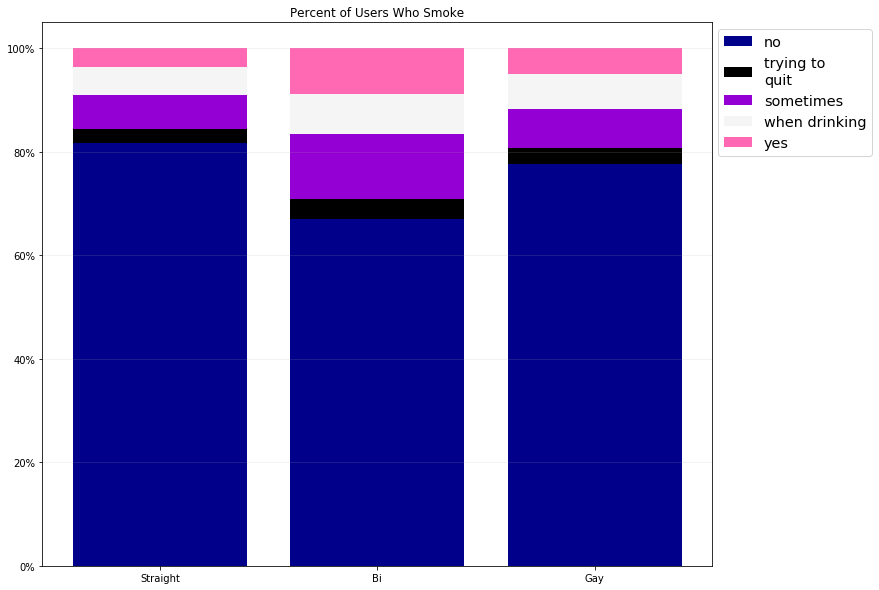

In [26]:
plt.figure(figsize=(12,10))
smokes_labels = ['no', 'trying to\nquit', 'sometimes', 'when drinking', 'yes']
smokes = [[len(df[(df['orientation_code']==i) & (df['smokes_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['smokes_code']>=0)]) for i in range(-1,2)] for j in range(5)]

bars1 = np.add(smokes[0],smokes[1]).tolist()
bars2 = np.add(bars1,smokes[2]).tolist()
bars3 = np.add(bars2,smokes[3]).tolist()

plt.bar(orientation_key,
       smokes[0],
       color='darkblue',
       label=smokes_labels[0])
plt.bar(orientation_key,
       smokes[1],
       color='black',
       label=smokes_labels[1],
       bottom=smokes[0])
plt.bar(orientation_key,
       smokes[2],
       color='darkviolet',
       label=smokes_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       smokes[3],
       color='whitesmoke',
       label=smokes_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       smokes[4],
       color='hotpink',
       label=smokes_labels[4],
       bottom=bars3)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.gca().yaxis.grid(True, alpha=0.2)
plt.legend(loc=1, bbox_to_anchor=(1.25,1), fontsize='x-large')
plt.title('Percent of Users Who Smoke')

plt.savefig('smokers.png', bbox_inches='tight')
plt.show()

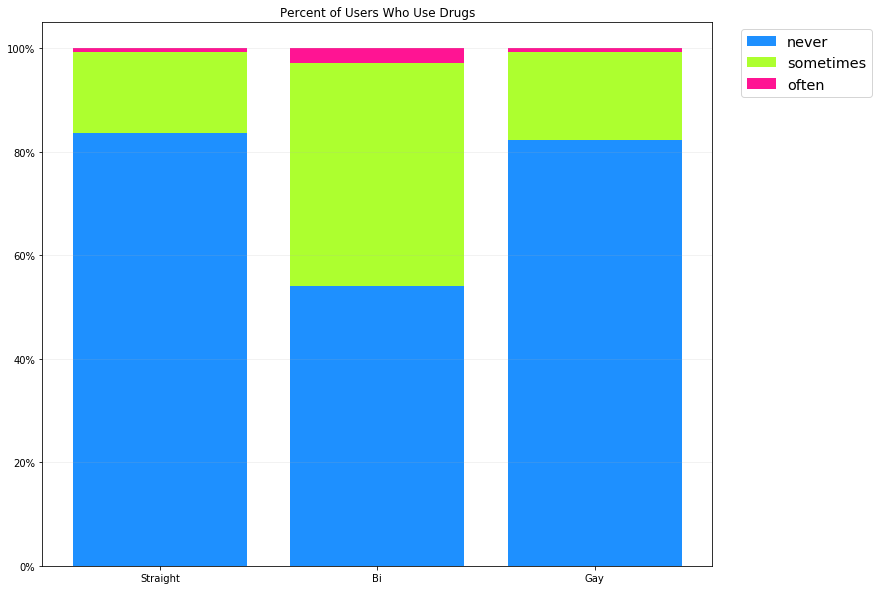

In [27]:
plt.figure(figsize=(12,10))
drugs_labels = ['never', 'sometimes', 'often']
drugs = [[len(df[(df['orientation_code']==i) & (df['drugs_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['drugs_code']>=0)]) for i in range(-1,2)] for j in range(3)]

bars1 = np.add(drugs[0],drugs[1]).tolist()

plt.bar(orientation_key,
       drugs[0],
       color='dodgerblue',
       label=drugs_labels[0])
plt.bar(orientation_key,
       drugs[1],
       color='greenyellow',
       label=drugs_labels[1],
       bottom=drugs[0])
plt.bar(orientation_key,
       drugs[2],
       color='deeppink',
       label=drugs_labels[2],
       bottom=bars1)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.gca().yaxis.grid(True, alpha=0.2)
plt.legend(loc=1, bbox_to_anchor=(1.25,1), fontsize='x-large')
plt.title('Percent of Users Who Use Drugs')

plt.savefig('drug_users.png', bbox_inches='tight')
plt.show()

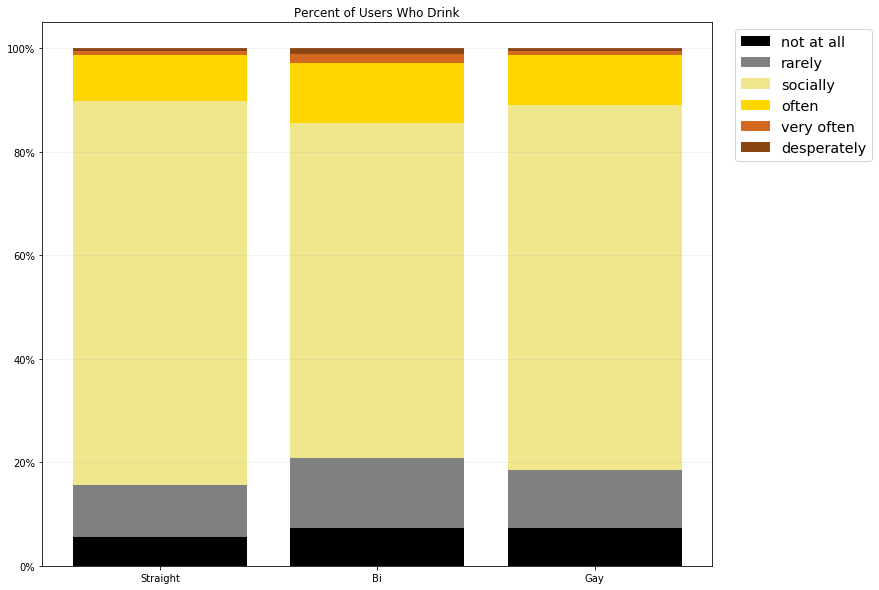

In [28]:
plt.figure(figsize=(12,10))
drinks_labels = ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately']
drinks = [[len(df[(df['orientation_code']==i) & (df['drinks_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['drinks_code']>=0)]) for i in range(-1,2)] for j in range(6)]

bars1 = np.add(drinks[0],drinks[1]).tolist()
bars2 = np.add(bars1,drinks[2]).tolist()
bars3 = np.add(bars2,drinks[3]).tolist()
bars4 = np.add(bars3,drinks[4]).tolist()

plt.bar(orientation_key,
       drinks[0],
       color='black',
       label=drinks_labels[0])
plt.bar(orientation_key,
       drinks[1],
       color='gray',
       label=drinks_labels[1],
       bottom=drinks[0])
plt.bar(orientation_key,
       drinks[2],
       color='khaki',
       label=drinks_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       drinks[3],
       color='gold',
       label=drinks_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       drinks[4],
       color='chocolate',
       label=drinks_labels[4],
       bottom=bars3)
plt.bar(orientation_key,
        drinks[5],
        color='saddlebrown',
        label=drinks_labels[5],
        bottom=bars4)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.gca().yaxis.grid(True, alpha=0.2)
plt.legend(loc=1, bbox_to_anchor=(1.25,1), fontsize='x-large')
plt.title('Percent of Users Who Drink')

plt.savefig('drinkers.png', bbox_inches='tight')
plt.show()

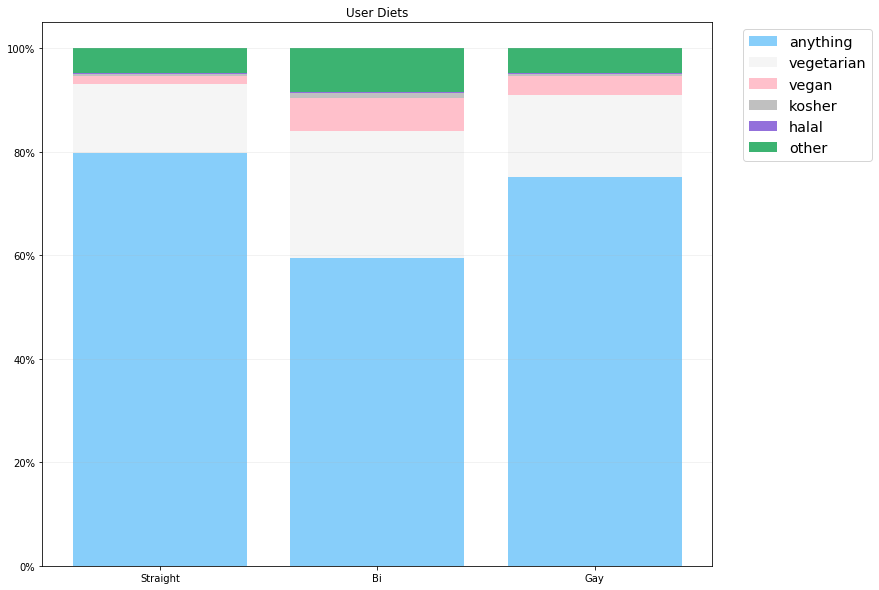

In [95]:
plt.figure(figsize=(12,10))
diet_labels = ['anything', 'vegetarian', 'vegan', 'kosher', 'halal', 'other']
diet = [[len(df[(df['orientation_code']==i) & (df['diet_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['diet_code']>=0)]) for i in range(-1,2)] for j in range(6)]

bars1 = np.add(diet[0],diet[1]).tolist()
bars2 = np.add(bars1,diet[2]).tolist()
bars3 = np.add(bars2,diet[3]).tolist()
bars4 = np.add(bars3,diet[4]).tolist()

plt.bar(orientation_key,
       diet[0],
       color='lightskyblue',
       label=diet_labels[0])
plt.bar(orientation_key,
       diet[1],
       color='whitesmoke',
       label=diet_labels[1],
       bottom=diet[0])
plt.bar(orientation_key,
       diet[2],
       color='pink',
       label=diet_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       diet[3],
       color='silver',
       label=diet_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       diet[4],
       color='mediumpurple',
       label=diet_labels[4],
       bottom=bars3)
plt.bar(orientation_key,
        diet[5],
        color='mediumseagreen',
        label=diet_labels[5],
        bottom=bars4)

plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
#plt.ylim(.5,1.02)
plt.gca().yaxis.grid(True, alpha=0.2)
plt.legend(loc=1, bbox_to_anchor=(1.25,1), fontsize='x-large')
plt.title('User Diets')

plt.savefig('diet.png', bbox_inches='tight')
plt.show()

# Body Type and Age
#### body_code

|body|code|
|---|---|
|unknown|-1|
|used up|0|
|overweight|1|
|full_figured|2|
|curvy|3|
|a little extra|4|
|average|5|
|thin|6|
|skinny|7|
|athletic|8|
|fit|9|
|jacked|10|

#### height
Ranges from 1 to 95

#### age
Ranges from 18 to 110

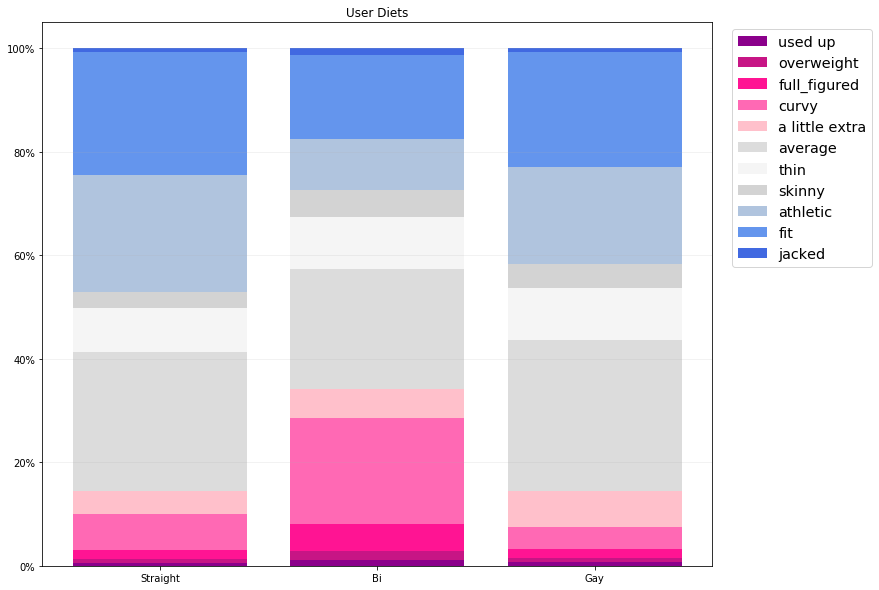

In [99]:
plt.figure(figsize=(12,10))
body_labels = ['used up', 'overweight', 'full_figured', 'curvy', 'a little extra',
               'average', 'thin', 'skinny', 'athletic', 'fit', 'jacked']
body = [[len(df[(df['orientation_code']==i) & (df['body_code']==j)])/
            len(df[(df['orientation_code']==i) & (df['body_code']>=0)]) for i in range(-1,2)] for j in range(11)]

bars1 = np.add(body[0],body[1]).tolist()
bars2 = np.add(bars1,body[2]).tolist()
bars3 = np.add(bars2,body[3]).tolist()
bars4 = np.add(bars3,body[4]).tolist()
bars5 = np.add(bars4,body[5]).tolist()
bars6 = np.add(bars5,body[6]).tolist()
bars7 = np.add(bars6,body[7]).tolist()
bars8 = np.add(bars7,body[8]).tolist()
bars9 = np.add(bars8,body[9]).tolist()

plt.bar(orientation_key,
       body[0],
       color='darkmagenta',
       label=body_labels[0])
plt.bar(orientation_key,
       body[1],
       color='mediumvioletred',
       label=body_labels[1],
       bottom=body[0])
plt.bar(orientation_key,
       body[2],
       color='deeppink',
       label=body_labels[2],
       bottom=bars1)
plt.bar(orientation_key,
       body[3],
       color='hotpink',
       label=body_labels[3],
       bottom=bars2)
plt.bar(orientation_key,
       body[4],
       color='pink',
       label=body_labels[4],
       bottom=bars3)
plt.bar(orientation_key,
        body[5],
        color='gainsboro',
        label=body_labels[5],
        bottom=bars4)
plt.bar(orientation_key,
        body[6],
        color='whitesmoke',
        label=body_labels[6],
        bottom=bars5)
plt.bar(orientation_key,
        body[7],
        color='lightgray',
        label=body_labels[7],
        bottom=bars6)
plt.bar(orientation_key,
        body[8],
        color='lightsteelblue',
        label=body_labels[8],
        bottom=bars7)
plt.bar(orientation_key,
        body[9],
        color='cornflowerblue',
        label=body_labels[9],
        bottom=bars8)
plt.bar(orientation_key,
        body[10],
        color='royalblue',
        label=body_labels[10],
        bottom=bars9)


plt.yticks([0.2*i for i in range(6)], [str(20*i) +'%' for i in range(6)])
plt.gca().yaxis.grid(True, alpha=0.2)
plt.legend(loc=1, bbox_to_anchor=(1.25,1), fontsize='x-large')
plt.title('User Diets')

plt.savefig('body_types.png', bbox_inches='tight')
plt.show()

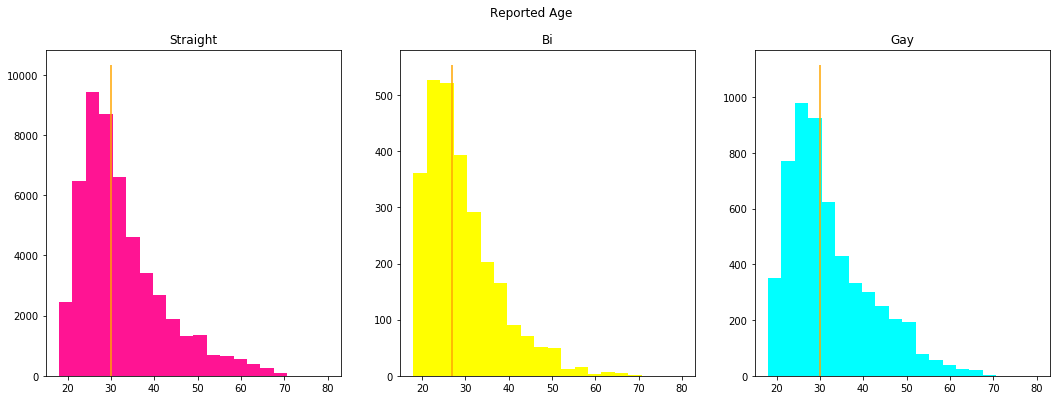

In [71]:
plt.figure(figsize=(18,6))
plt.suptitle('Reported Age')
for j in range(-1,2):
    plt.subplot(1,3,j+2)
    plt.hist(df[df['orientation_code']==j]['age'], range=(18,80), bins=20, color=colors_pan[j+1])
    plt.vlines(x=df[df['orientation_code']==j]['age'].median(),
              ymin=0,
              ymax=len(df[df['orientation_code']==j])/5,
              color='orange')
    plt.title(orientation_key[j+1])

plt.savefig('age.png')
plt.show()

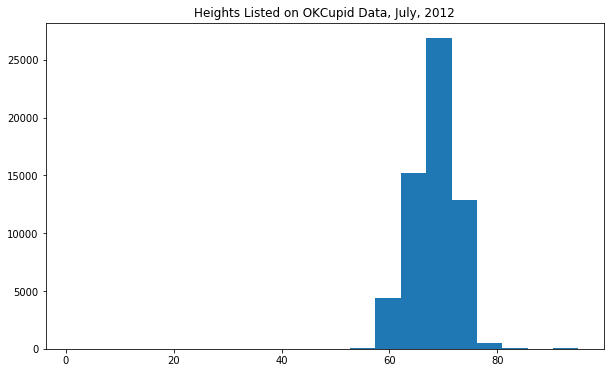

In [33]:
plt.figure(figsize=(10,6))

plt.hist(df['height'].dropna(), bins=20)
plt.title('Heights Listed on OKCupid Data, July, 2012')

plt.savefig('heights_hist.png')
plt.show()

# Essays

#### essay0
My self-summary

#### essay1
What I'm doing with my life

#### essay2
I'm really good at

#### essay3
The first thing people notice about me

#### essay4
Favorite books, movies, shows, music, and food

#### essay5
Six things I could never do without

#### essay6
I spend a lot of time thinking about

#### essay7
On a typical Friday night I am

#### essay8
The most private thing I'm willing to admit

#### essay9
You should message me if

In [34]:
print(f'There are {str(df["essay0"].isna().sum())} profiles with a blank "About me" section.')
print(f'There are {str(df["essay1"].isna().sum())} profiles with a blank "What I\'m doing with my life" section.')
print(f'There are {str(df["essay2"].isna().sum())} profiles with a blank "I\'m really good at" section.')
print(f'There are {str(df["essay3"].isna().sum())} profiles with a blank "The first thing people notice about me" section.')
print(f'There are {str(df["essay4"].isna().sum())} profiles with a blank "Favorite books, movies, shows, music, and food" section.')
print(f'There are {str(df["essay5"].isna().sum())} profiles with a blank "Six things I could never do without" section.')
print(f'There are {str(df["essay6"].isna().sum())} profiles with a blank "I spend a lot of time thinking about" section.')
print(f'There are {str(df["essay7"].isna().sum())} profiles with a blank "On a typical Friday night I am" section.')
print(f'There are {str(df["essay8"].isna().sum())} profiles with a blank "The most private thing I\'m willing to admit" section.')
print(f'There are {str(df["essay9"].isna().sum())} profiles with a blank "You should message me if" section.')


There are 5488 profiles with a blank "About me" section.
There are 7572 profiles with a blank "What I'm doing with my life" section.
There are 9638 profiles with a blank "I'm really good at" section.
There are 11476 profiles with a blank "The first thing people notice about me" section.
There are 10537 profiles with a blank "Favorite books, movies, shows, music, and food" section.
There are 10850 profiles with a blank "Six things I could never do without" section.
There are 13771 profiles with a blank "I spend a lot of time thinking about" section.
There are 12451 profiles with a blank "On a typical Friday night I am" section.
There are 19225 profiles with a blank "The most private thing I'm willing to admit" section.
There are 12603 profiles with a blank "You should message me if" section.


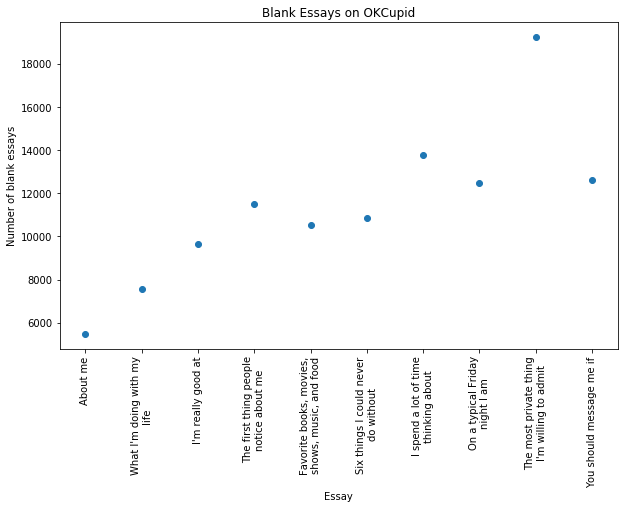

In [35]:
essay_number = range(10)
essay_labels = ['About me', 'What I\'m doing with my\nlife', 'I\'m really good at',
                'The first thing people\nnotice about me',
                'Favorite books, movies,\nshows, music, and food',
                'Six things I could never\ndo without',
               'I spend a lot of time\nthinking about',
               'On a typical Friday\nnight I am',
               'The most private thing\nI\'m willing to admit',
               'You should message me if']
blank_essays = [5488, 7572, 9638,11476, 10537, 10850, 13771, 12451, 19225, 12603]

plt.figure(figsize=(10,6))
plt.scatter(essay_number, blank_essays)
plt.title('Blank Essays on OKCupid')
plt.xlabel('Essay')
plt.xticks(essay_number,labels=essay_labels,rotation=90)
plt.ylabel('Number of blank essays')

plt.savefig('blank_essays.png', bbox_inches = "tight")
plt.show()

In [36]:
essay_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4',
              'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df['essay_len'] = all_essays.apply(lambda x: len(x))

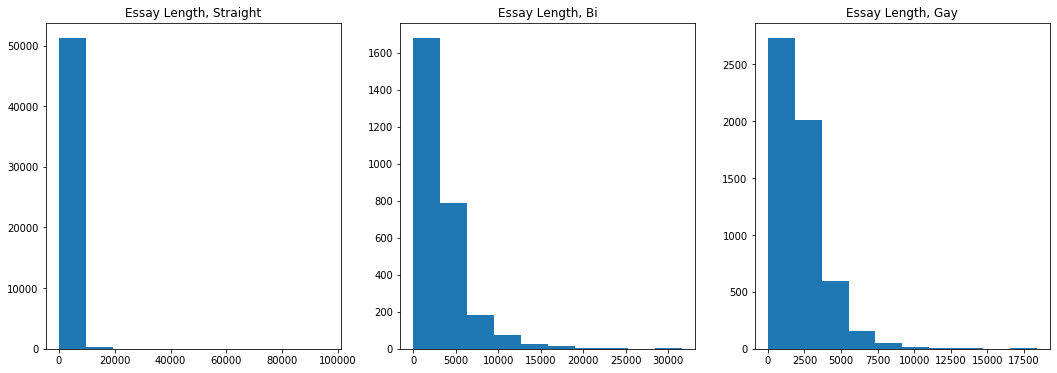

In [37]:
plt.figure(figsize=(18,6))

for j in range(-1,2):
    plt.subplot(1,3,j+2)
    plt.hist(df[df['orientation_code']==j]['essay_len'])
    plt.title('Essay Length, ' + orientation_key[j+1])
    
plt.show()

In [38]:
df['essay_len'].max()

96277

In [39]:
df[df['essay_len']==96277]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,status_code,languages_spoken,smokes_code,sign_code,sign_serious,sex_code,religion_code,religion_serious,cats_code,dogs_code,orientation_code,has_kids,wants_kids,job_code,ethnicity_white,ethnicity_black,ethnicity_other,ethnicity_hispanic,ethnicity_pacific_islander,ethnicity_native_american,ethnicity_middle_eastern,ethnicity_indian,education_code,drugs_code,drinks_code,diet_code,body_code,essay_len
27528,36,athletic,mostly other,not at all,never,graduated from college/university,"before i say anything, can i offer, please che...","playing, exploring, doing my part to make the ...","creative <a class=""ilink"" href=""/interests?i=p...",my smile. my energy. my open heart. my express...,"<b>movies:</b> <a class=""ilink"" href=\n""/inter...","the state of being-ness; nature, expressing my...",i prefer female heroine/protagonist stories(bo...,"nothing fits here.<br />\nif you have n-flix, ...","i get off on all forms of expression, love wei...",you made it this far and you like something yo...,white,68.0,40000,medicine / health,2012-06-30-02-53,"berkeley, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,other and laughing about it,m,cancer and it&rsquo;s fun to think about,no,"english, spanish (poorly), german (poorly)",single,1,3,0,3,1,0,8,0,1,1,-1,0,-1,9,1,0,0,0,0,0,0,0,3,0,0,5,8,96277


In [40]:
all_essays_clean = all_essays.replace(r'<.*>', '', regex = True)
all_essays_clean = all_essays_clean.replace(r'[-,\.;:\+\(\)/=\?\"<>%&~\|\!\]\[]', '', regex = True)
all_essays_clean = all_essays_clean.replace(r'href|classilink', '', regex = True)
all_essays_clean = all_essays_clean.replace(r'http[\w\d]*', '', regex = True)

all_essays_wc = all_essays_clean.apply(lambda x: len(x.split()))

df['essay_len_clean'] = all_essays_clean.apply(lambda x: len(x))
df['essay_wc'] = all_essays_wc

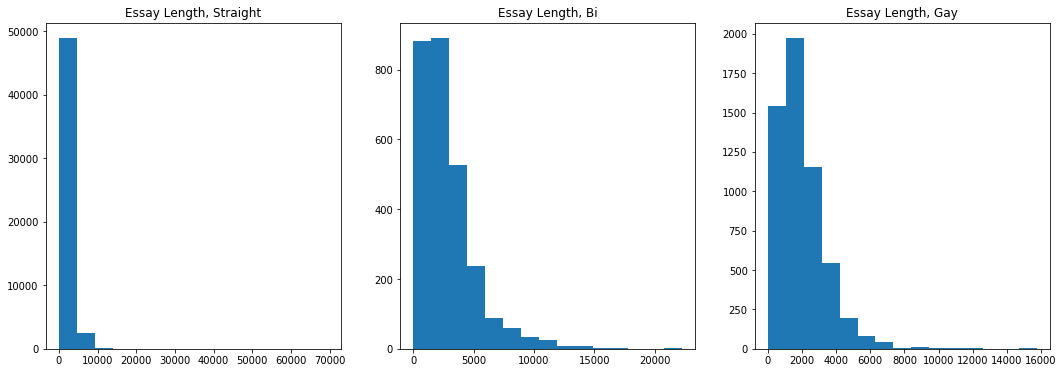

In [41]:
plt.figure(figsize=(18,6))

for j in range(-1,2):
    plt.subplot(1,3,j+2)
    plt.hist(df[df['orientation_code']==j]['essay_len_clean'], bins=15)
    plt.title('Essay Length, ' + orientation_key[j+1])
    
plt.show()

In [42]:
df['essay_len_clean'].max()

69476

In [43]:
print(all_essays_clean[27528])

before i say anything can i offer please check out

a  
interestsithebook2canastasia2cbymegre2ctheringingcedarseries2c3cbr2f3e0aandthefilms2c22zeitgeist222c22kymatica222ctheesotericagendaand0a22thrive22abletobeseenonyoutube
the book anastasia by megre the ringing cedar series
and the films zeitgeist kymatica the esoteric agenda and
thrive able to be seen on youtube

am reikiteacher redwood on facebook where you may find more
information on my wall

ringing a few bells
a  
interestsiawakeningkrysthla3cbr2f3e0amelchizedekheinleinnacaals22serpentoflife22egypt0athepowerofloveisstrongerthanyouknow2822notromanticlove220abutreallove29
awakeningkrysthla
melchizedekheinleinnacaalsserpent of life egypt
the power of love is stronger than you know not romantic love
but real love

unlike many here who select seeking friends as one of their
options and who spurn those that don't meet their fantasy ideal
romantic partner i am open to any and all manner of associations
that are meant to be that feel r

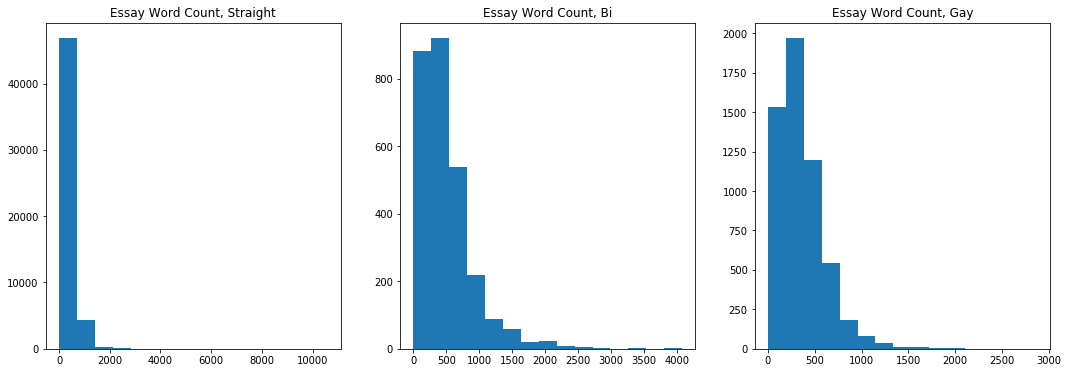

In [44]:
plt.figure(figsize=(18,6))

for j in range(-1,2):
    plt.subplot(1,3,j+2)
    plt.hist(df[df['orientation_code']==j]['essay_wc'], bins=15)
    plt.title('Essay Word Count, ' + orientation_key[j+1])
    
plt.show()

In [45]:
for i in range(-1,2):
    print(orientation_key[i+1]+':')
    print('\tMedian word count:\t' + str(df[df['orientation_code']==i]['essay_wc'].median()))
    print('\tAverage word count:\t' + str(df[df['orientation_code']==i]['essay_wc'].mean()))
    print('\tLowest word count:\t' + str(df[df['orientation_code']==i]['essay_wc'].min()))
    print('\tHighest word count:\t' + str(df[df['orientation_code']==i]['essay_wc'].max()))


Straight:
	Median word count:	291.0
	Average word count:	347.3732899275278
	Lowest word count:	0
	Highest word count:	10593
Bi:
	Median word count:	408.0
	Average word count:	497.51861221539576
	Lowest word count:	0
	Highest word count:	4080
Gay:
	Median word count:	308.0
	Average word count:	351.7480710568814
	Lowest word count:	0
	Highest word count:	2868


# Let's make a gaydar!

In [46]:
df['all_essays_clean'] = all_essays_clean

In [47]:
print(len(df[df['orientation_code']==-1]), len(df[df['orientation_code']>=0]))

51606 8340


In [48]:
from sklearn.utils import resample

straight_text = df[df['orientation_code']==-1]['all_essays_clean'].tolist()
queer_text = df[df['orientation_code']>=0]['all_essays_clean'].tolist()
queer_text = resample(queer_text,
                     replace=True,
                     n_samples=51606,
                     random_state=123)

all_text = straight_text + queer_text
text_labels = [0] * len(straight_text) + [1] * len(queer_text)

In [49]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(all_text,
                                                                    text_labels,
                                                                    test_size=0.1,
                                                                    random_state=4)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

nbclassifier = MultinomialNB()
nbclassifier.fit(train_counts, train_labels)
predictions = nbclassifier.predict(test_counts)

print(accuracy_score(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))

0.8466382484014726
[[4598  552]
 [1031 4141]]


In [52]:
print(len(df[df['orientation_code']==-1])/len(df))

0.8608747873085777


In [53]:
kara = """I am a queer, quirky, married, polyamorous person who loves to fuck with contemporary society. I am a butch trans woman who is often sporting stuble because my beard is feminine to me. I have a toddler who is adorable! I am left of left when it comes to politics and quite the activist (I have the only career that allows me to get arrested and it will be a positive).
Working as a social worker in senior services and presenting on lgbt rights for older adults. Received a masters in social work and a masters in human sexuality. I love sociological theory. Raising a communist child with bodily autonomy.
Talking about Queer Studies, making out, Video Games, thinking of something to do when people are bored, taking random roadtrips when the mood calls to me.Constant anxiety but it's manageable.
my skinny frame and my widows peak
Book: The Dark Tower Series, A Song of Ice and Fire, Lord of the Rings, Kurt Vonnegut, Kate Bornstein, Neil Gaiman, Stephen King, Alan Moore.
Movie:Pink Floyd's The Wall, Shortbus, Kill Bill, Revolver, Lock, Stock and two smoking barrels, Snatch, Amelie, Juno, The Sound of Music, Jesus Christ Superstar, Sweeny Todd, Nightmare Before Christmas.
Shows: hgtv is wholesome content! Nailed It! Woke stand up. Chopped. Impractical Jokers. Eric Andre, Key and Peele.
Youtubes: Worth it, tasty, yogscast, hot ones,CUT.
Podcast: Citizen Radio, Wait Wait don't tell me?,
Music:Edward Sharpe and the Magnetic Zeros, Peter, Bjorn, John, Death Cab for Cutie, Kimya Dawson, Mumford & Sons, Of Monsters and Men, Florence and the Machines, Paleface, Pink Floyd, Modest Mouse
Food: Sushi, Jerk Chicken, Peruvian chicken, Indian cuisine
My phone, My wallet, My emotions, My sense of humor, My social
awareness of privilege and my love for animals.
Queer Theory mostly and how my gender and sexual identity fall into it. I enjoy listening to people talk about subjects they love.
Home decompressing from the week and sometimes you'll find me at a dive bar. Let's get out and try some new ones
I'm into kink/bdsm and alternative relationships. Also that I own a sybian.
I am married and I am strictly non-monogamous
Preferably looking for a drinking buddy to go find new bars..
If your looking for a new friend to smoke with.
You want to talk about gender or kink culture.
If you want to go see live stand up comedy or stay home and watch some stand up.
If you want to tell someone about a really good book you read recently.
If the coin ends up tails.
"""

In [54]:
def classify_essay(text):
    text = text.lower()
    text_count = counter.transform([text])
    return nbclassifier.predict(text_count)[0]

In [55]:
print(classify_essay(kara))

1


In [56]:
print(classify_essay("""I’m a writer, an artist, and the leader of an arts education nonprofit. I am happiest when I am creating something--whether it’s a short story, a cocktail, or a strategic business plan. A friend once called me an “adventurous, generous soul.” I’d like to live up to that description.
Polyam. Queer. Intersectional feminist.
Beginnings
Climbing on top of high places
Deliberate community
Making jewelry out of garbage
Spinning yarns
I try to be open, kind, and authentic. I smile a lot. I have a quirky sense of humor. I’m incredibly attracted to people who aren’t afraid to wear their hearts and passions for the world to see.
I love books that make me think of storytelling in new ways. I’m into non-traditional narrative structures and genre-bending, but, at the end of the day, I’m charmed by a good story. I organize an intersectional feminist sex-positive geek book club. We read and discuss spec fic with strong intersectional representation, often including queer and/or polyamorous characters.
Currently reading: Station Eleven by Emily St. John Mandel, Smoke Gets in Your Eyes by Caitlin Doughty.
Best books I've read recently: The Fifth Season, The Obelisk Gate, The Stone Sky, Between the World and Me, The Hate U Give, Hunger: a Memoir of My Body, Fangirl, Wild Seed, Parable of the Sower, Alias Grace, Her Body and Other Parties, The Lamb Will Slaughter the Lion, The Barrow Will Send What It May, Binti, Eloquent Rage, Children of Blood and Bone, Out of Step, Sing, Unburied, Sing, All the Birds in the Sky, On the Come Up, Oryx and Crake, What the Eyes Don't See, The Immortalists, Black Wave
Currently on my playlist: Depeche Mode, The Organ, Heartless Bastards, Amanda Palmer, Tristen, The Smiths, The Cure, David Bowie, TV on the Radio, Neutral Milk Hotel, The Shins, The Raveonettes, Arcade Fire, Everything Everything, Dark Blue, Joy Division, CHVRCHES, Sinead O'Connor, Brian Eno, Tacocat, Metric, Iggy Pop, Tribe Called Quest, Sia, Interpol, Laura Marling, Neko Case, The Damned, Toadies, Buzzcocks, AURORA, Wolf Alice, Lizzo, The Mountain Goats, The Highwomen, PJ Harvey, clipping, Fiona Apple, Angel Olsen, Mitski.
1. Community
2. Stories
3. Corrective lenses
4. Artmaking
5. Adventure
6. A GPS
7. A healthy disregard for rules
-Mixing cocktails and sharing stories with friends and partners
-Making jewelry while marathoning Quantum Leap, The Golden Girls, or Unsolved Mysteries
-Hosting an art show or an art-making event
-Selling art and speaking on panels at a sci fi convention
-Writing a new story
-Rock-climbing
-Cuddling with cats
I was once paid to be a spy. Anchovies are the best way to eat a pizza. I was a varsity fencer in high school. I know the intro to Quantum Leap by heart. All of my celebrity crushes are on authors. I eat peanut butter directly out of the jar. I am impossibly clumsy. I will do absolutely anything for the people I love.
You are more interested in creating than consuming (unless we're talking about cheese ...or vintage cocktails).
You are a writer or an artist and you want to collaborate on something fabulous.
You like to climb rocks.
You have a book recommendation.
You practice ethical non-monogamy.""")) # queer

1


In [57]:
print(classify_essay("""Hi
Music lover, photographer, movie buff, Yogi, artist, and Entrepreneur. Im looking to make new local connections✨
Right now! I love my job 
I’m a drone pilot and photographer
My creativity levels are extremely high...great at designing and art...but it all translates into the moment to moment. Lately I’ve been really focused on Photography and Drone Photography.
I would love to meet more people to collaborate on some Art. visual art or something around music:)
Cooking really yummy food. Lots of fresh ingredients and creative spins On dishes. I love brunch foods or something fancy like grilled steaks with some savory herbed butter I was a chef for a few years, but got burnt out on the crazy hours. Now I just cook for friends.
I’ve heard that I’m good at henna and giving massages. And I roll amaze joints
My eyes I’m 6’2
Authors: Ray Bradbury, Murakami, Ken Kesey, Aldous Huxley, Alan Watts, Joseph Campbell, Carl gustov Jung, Elkhart Tolle, Ram Dass, Hermann Hesse
Movies: Amadeus, Spirited away, Jaws, Close encounter of the third kind, Dr Strange love, The Master, Raising Arizona, Lolita, fantastic planet, the fountain, Sunshine, The Tale of the Princess Kaguya, willy wonks, chitty chitty bang bang, Dark Crystal, Perfume, The Fall. How to train your dragon, Castle in the sky, Ponyo, Nausicaä of the Valley of the Wind
Music: the Beatles, Boards of Canada, devotchka, django django, kaada, flaming lips, Grateful Dead (Dead and Company) sandro perri, Jim James, Mogwai, Battles, cave in, pink Floyd, Harry Nilsson, andrew bird, radiohead, shpongle, syd Barrett, NIN, Juana Molina, Peter Gabriel, midlake, Father John Misty, fleet foxes, Lamp of the Universe, desert dwellers, beck, Nicholas jarr, Darkside, tortoise, unknown mortal orchestra, tame impala, Lennon clay pool dilerium, umphrey McGee, Dopapod, Sopwith Camel, Cat Stevens, Akron Family, polish ambassador, wolfy Amadeus Mozart,
Damien Jurado, joe Ruso, Jim James, jonathan wilson
Music
Yoga
Sun beams
Family
Laughter
Ocean waves
everyday adventures with friends. I find myself just snapping photos and editing for the fun of the process. I just enjoy visual art and cinema from a young age always grabbed my imagination. Looking at things in life with unique eyes and melding it with a cool aesthetic is always fun.
I like to stay in and make art on Fridays or go out dancing. I can be a spontaneous one✌️
I've been naked in a desert
-You are You I love genuine and unique people.
Right now in life I’m open for some new connections and Spring adventures
Artists, kinksters, kind souls""")) # straight

0


In [58]:
print(classify_essay("""I don't have time for this utter bullshit and my clavicle is now safely swathed in a bit of meat and if you aren't with the revolution get out of my way" And also it would be like I think relationship anarchy is bullshit libertarian stuff (or can be used that way) to avoid real commitment and accountability and we need LESS of that. We need far more accountability, community commitment and dealign that we DO hurt each other's feelings.
""")) # queer

1


In [59]:
print(classify_essay("""68 degrees, sunny, intermittent misting. The morning starts around 7am with cat cuddles and hot tea. I'd spend a few hours strolling around the small town and chatting in a pet friendly bookstore before going hiking on a trail. Home-cooked lunch with a view. Climb back down to a small bar with delightful food, live music, and late night, goofy dancing.
Book: The Little Prince, Stephen King's "Everything's Eventual", The Yellow Wallpaper, The Stormlight Chronicles

Movie: The Fountain

Shows: LOVECRAFT COUNTRY, Black Clover, She-Ra

Music: Anything fun. I love bluegrass, soul, hip hop, glam rock, folk metal, 90s and 2000s pop and R+B

Food: Indian and Ethiopian, anything picked
 only ❤️

I'm Danielle, she/her, genderqueer, graysexual, and based out of Baltimore. At the moment I'm working two jobs and going to school. I'm looking for femme energy and long term relationships. I'm currently in two relationships, and eventually I'd like to find a nesting partner, get married, and be a part of someone's kids' lives. I'm in no rush, and also don't need/expect all of those from one person.

I'm a big fan of hypersexual and deviant art. The fictional worlds I love the most are post-apocalyptic sci-fi and fantasy. I spend a lot of time reading about psychology/anthropology regarding friendship, intimacy, sex, kink, gender expression, taboos, romantic vs platonic touch, etc, and how all of these differ by culture. If I were psychoanalyzing myself I'd relate it to my conservative upbringing and being on the asexual spectrum.
*Disclaimer: I'm not well read on any of these, so I'm always open to suggestions!

In my free time I listen to audiobooks, do puzzles, and enjoy exploring nature. When the pandemic is over (actually over), I look forward to going back to my gym. While I'm not a homebody, I also don't love places with lots of stimulation. I like to be social, but with only a couple people at a time, and I don't go to concerts because they're overstimulating and overwhelming.

About my sexuality: Kink is an important part of my life even though sex isn't a motivating factor for me. I'm a switch looking for intimacy and connection, usually through power dynamics and little space. I'm into electricity, bondage and rope, grappling, and power play. I'm not opposed to group scenarios, but I'll need my emotional buckets filled first.
(Aside: I'd like to find a mentor for my topping journey).

Thanks for reading!

I'll edit this for clarity at a future date.
""")) # queer

1


# How about with other factors?

In [60]:
df['nb_prediction'] = df['all_essays_clean'].apply(lambda x: classify_essay(x))

In [61]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,status_code,languages_spoken,smokes_code,sign_code,sign_serious,sex_code,religion_code,religion_serious,cats_code,dogs_code,orientation_code,has_kids,wants_kids,job_code,ethnicity_white,ethnicity_black,ethnicity_other,ethnicity_hispanic,ethnicity_pacific_islander,ethnicity_native_american,ethnicity_middle_eastern,ethnicity_indian,education_code,drugs_code,drinks_code,diet_code,body_code,essay_len,essay_len_clean,essay_wc,all_essays_clean,nb_prediction
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,1,1,2,2,-1,0,1,3,1,1,-1,0,1,2,1,0,0,0,0,0,0,0,2,0,2,0,4,2644,2393,450,about me\n\ni would love to think that i was s...,0
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,1,3,0,3,-1,0,1,1,1,1,-1,0,1,3,1,0,0,0,0,0,0,0,-1,1,3,5,5,1453,1344,265,i am a chef this is what that means\n1 i am a ...,0
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",unknown,68.0,-1,unknown,2012-06-27-09-10,"san francisco, california",unknown,straight,has cats,unknown,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,2,3,0,11,0,0,-1,-1,2,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,4,-1,2,0,6,5517,5135,856,i'm not ashamed of much but writing public tex...,0
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,unknown,m,pisces,no,"english, german (poorly)",single,1,2,0,11,-1,0,-1,-1,1,-1,-1,-1,0,1,1,0,0,0,0,0,0,0,2,-1,2,1,6,477,429,67,i work in a library and go to school reading...,1
4,29,athletic,unknown,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,cr

In [62]:
from sklearn.preprocessing import MinMaxScaler

features = ['smokes_code', 'sign_serious', 'sex_code', 'religion_code',
            'religion_serious', 'job_code', 'education_code', 'drugs_code',
            'drinks_code', 'diet_code', 'body_code', 'nb_prediction']

straight_features = df[df['orientation_code']==-1][features]
queer_features = df[df['orientation_code']>=0][features]
queer_features = resample(queer_features,
                          replace=True,
                          n_samples=51606,
                          random_state=123)

feature_data = pd.concat([straight_features, queer_features])
final_labels = [0] * len(straight_features) + [1] * len(queer_features)

x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

In [63]:
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(x_scaled,
                                                                    final_labels,
                                                                    test_size=0.2,
                                                                    random_state=4)

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfclassifier = RandomForestClassifier(n_estimators=2000, random_state=0)
rfclassifier.fit(train_data2, train_labels2)

print(rfclassifier.score(test_data2, test_labels2))

0.9451145666811994


In [65]:
rfpredictions = rfclassifier.predict(test_data2)

print(confusion_matrix(test_labels2, rfpredictions))

[[ 9250   986]
 [  147 10260]]
